# Imports

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk(r'.\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\data\sample_submission.csv
.\data\test.csv
.\data\train.csv


# Import data

In [16]:
sample_submission = pd.read_csv(r".\data\sample_submission.csv")
test = pd.read_csv(r".\data\test.csv")
train = pd.read_csv(r".\data\train.csv")

# Compare train with test

In [17]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


* Transported col is not given in test set as it should be preticted by model and returned in submission file, like this:

In [19]:
sample_submission.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Evaluate training data

## 1. Distribution of class

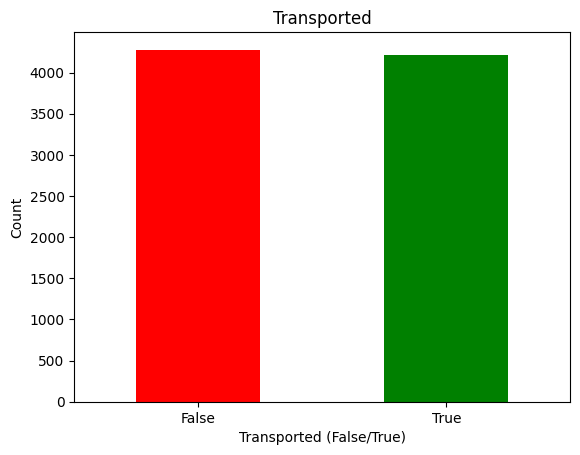

In [52]:
train['Transported'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Transported')
plt.xlabel('Transported (False/True)')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

## 2. Check for missing values

In [20]:
train[train.isnull().all(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


as you can see there is no row full of null

In [21]:
def analize_data(df, data_name="data"):
  print("Analysis of: "+data_name)
  print("Number of objects: ", df.shape[0])
  print("Number of attributes: ", df.shape[1])
  print("Number of objects with at least 1 missing value: %d" % df.isnull().any(axis=1).sum())
  print("Number of missing values in attributes:")
  missing_val_count_by_column = (df.isnull().sum())
  missing_val= (missing_val_count_by_column[missing_val_count_by_column > 0])
  for column, count in missing_val.items():
    print("  %s: %d  (%.2f%%)" % (column, count, count/df.shape[0]*100))
  print()

In [22]:
analize_data(train, "train_data")

Analysis of: train_data
Number of objects:  8693
Number of attributes:  14
Number of objects with at least 1 missing value: 2087
Number of missing values in attributes:
  HomePlanet: 201  (2.31%)
  CryoSleep: 217  (2.50%)
  Cabin: 199  (2.29%)
  Destination: 182  (2.09%)
  Age: 179  (2.06%)
  VIP: 203  (2.34%)
  RoomService: 181  (2.08%)
  FoodCourt: 183  (2.11%)
  ShoppingMall: 208  (2.39%)
  Spa: 183  (2.11%)
  VRDeck: 188  (2.16%)
  Name: 200  (2.30%)



## 3. Change datatype if needed

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [24]:
print(train['VIP'].unique())
print(train['CryoSleep'].unique())

[False True nan]
[False True nan]


In [25]:
train['VIP'] = train['VIP'].astype('bool')
train['CryoSleep'] = train['CryoSleep'].astype('bool')

Then we need to split *Cabin* attribute into 3 seperate attributes: *deck*, *num* and *side* as it is mentioned in dataset describtion.

In [26]:
train.dropna(subset=['Cabin'], inplace=True)
tmp = train['Cabin'].str.split('/', expand=True)
tmp.columns = ['Cabin_deck', 'Cabin_number', 'Cabin_side']
tmp_indx = train.columns.get_loc('Cabin')
for i, column in enumerate(tmp.columns):
    train.insert(tmp_indx+1+i, column, tmp[column])
train['Cabin_number']=train['Cabin_number'].astype('int')
train.drop('Cabin', axis=1, inplace=True)
train.replace({'P': "Port", 'S': "Starboard"}, inplace=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 4. Exploratory data analysis

### 1. Split to numerical and categorical data

In [27]:
for col in train:
    print(f"{col} - {train[col].nunique()}")

PassengerId - 8494
HomePlanet - 3
CryoSleep - 2
Cabin_deck - 8
Cabin_number - 1817
Cabin_side - 2
Destination - 3
Age - 80
VIP - 2
RoomService - 1256
FoodCourt - 1479
ShoppingMall - 1105
Spa - 1307
VRDeck - 1291
Name - 8277
Transported - 2


I put the columns that has not so much categories to train_cat

In [28]:
train_num = train[['Cabin_number', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
train_cat = train[['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP', 'CryoSleep']]

I abandoned id and name because these data is useless.

### 2. Draw chart for categorical and numerical data

### Class chart

C:\Users\filip\AppData\Local\Temp\ipykernel_24208\1126160120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


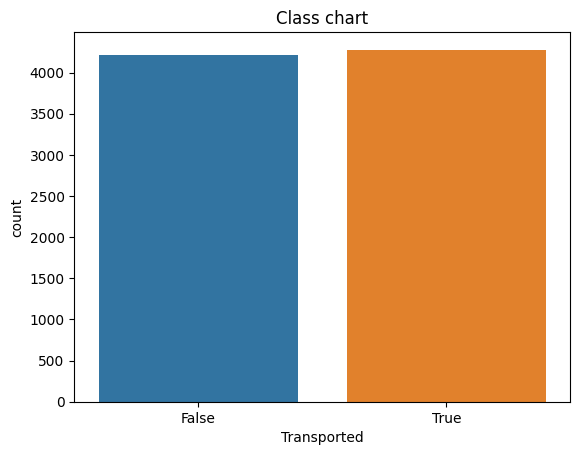

In [29]:
sns.countplot(
        data=train,
        x='Transported',
        palette=["#1f77b4", "#ff7f0e"]
    )
plt.title("Class chart")
plt.show()

### Categorical data charts

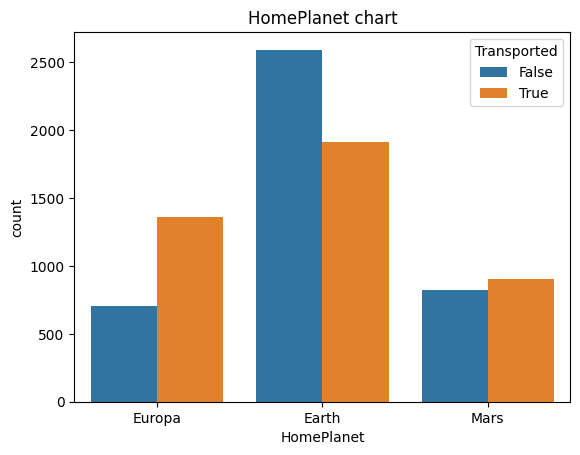

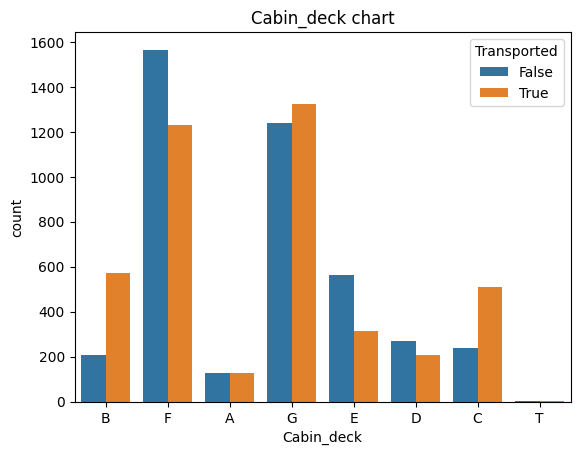

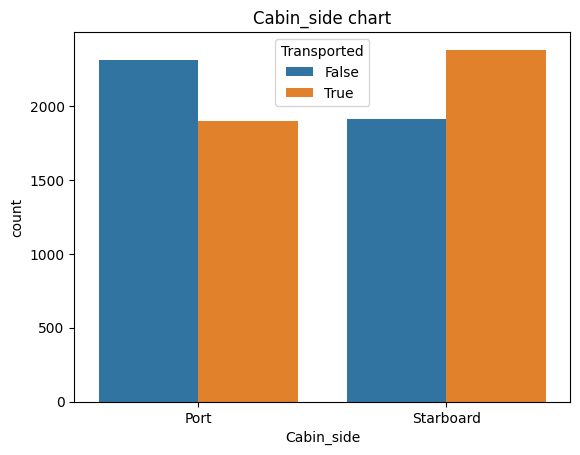

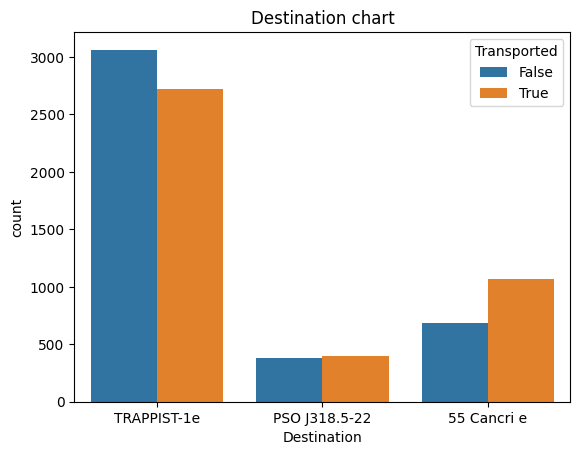

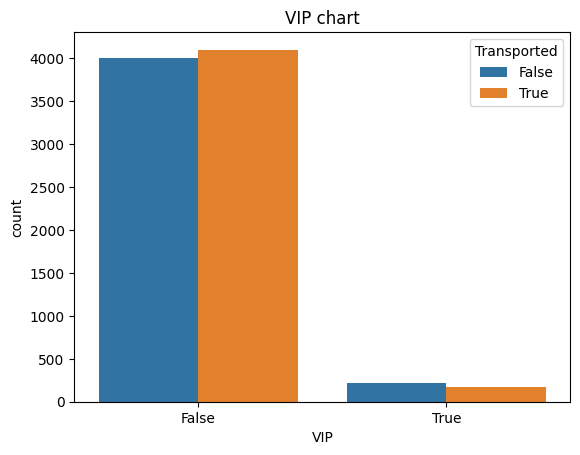

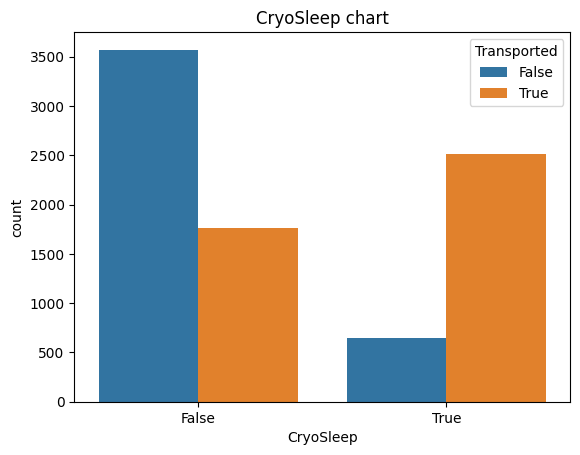

In [30]:
for column in train_cat:
    sns.countplot(
        data=train,
        x=column,
        hue="Transported"
    )
    plt.title(column+" chart")
    plt.show()

### 3. Numerical data charts

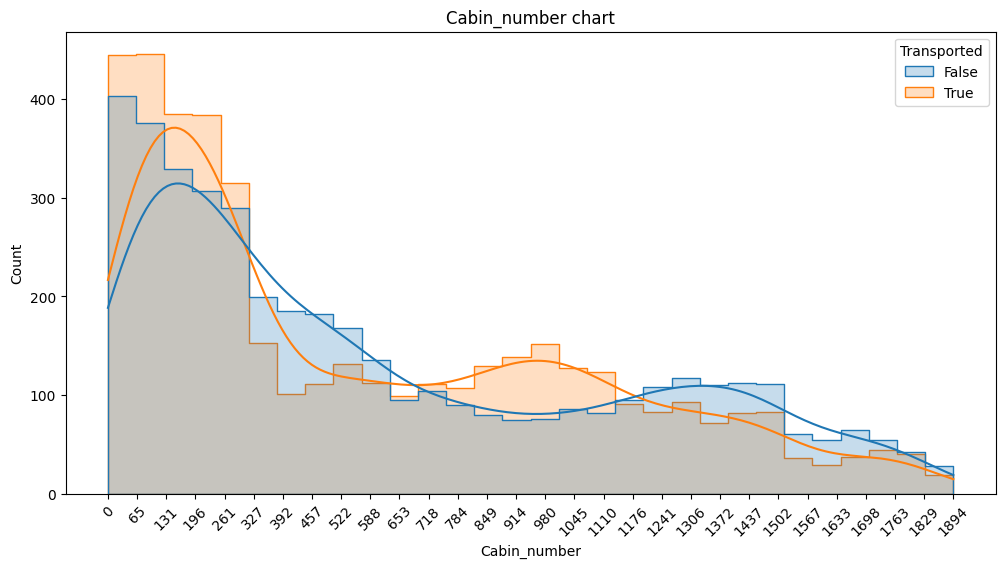

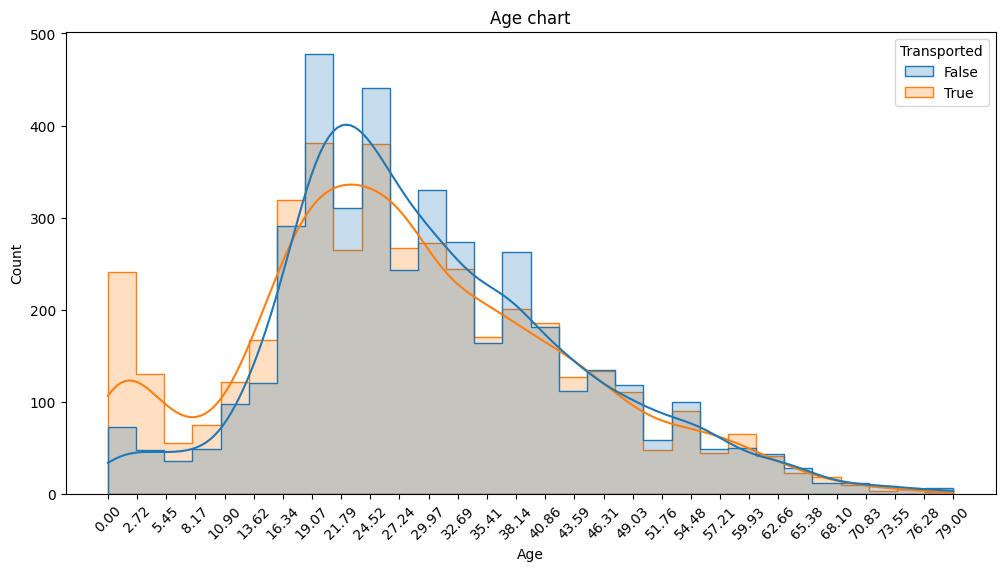

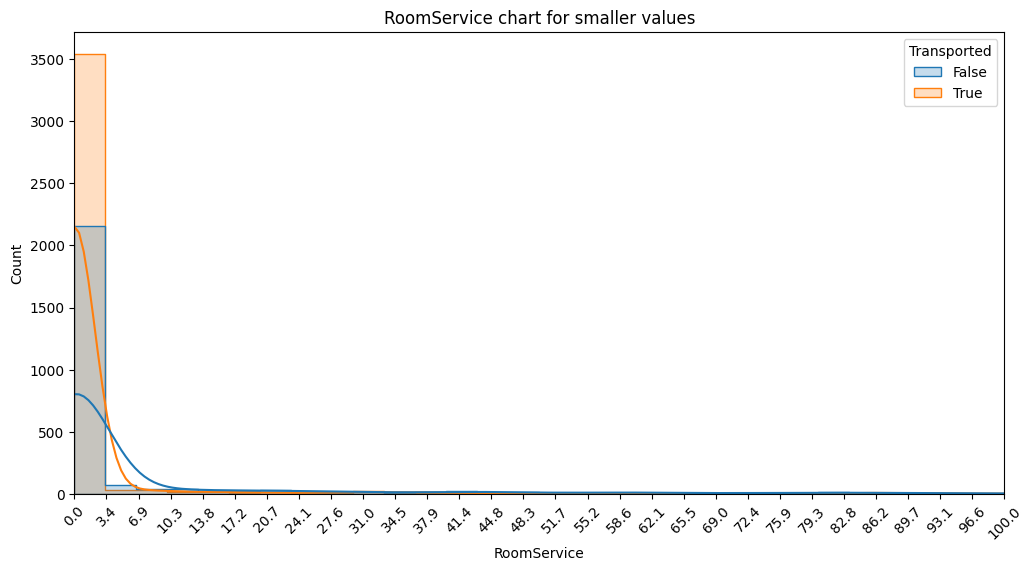

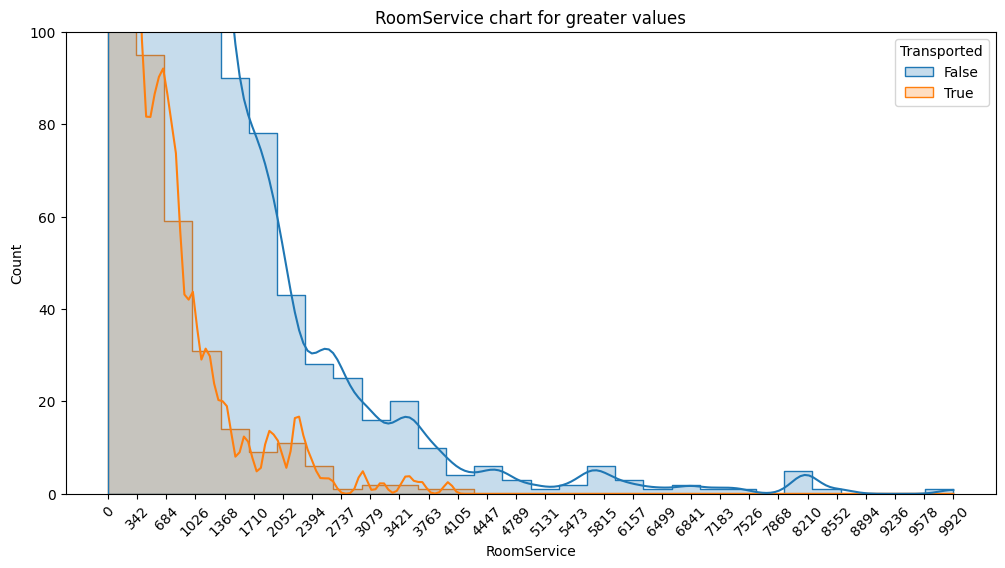

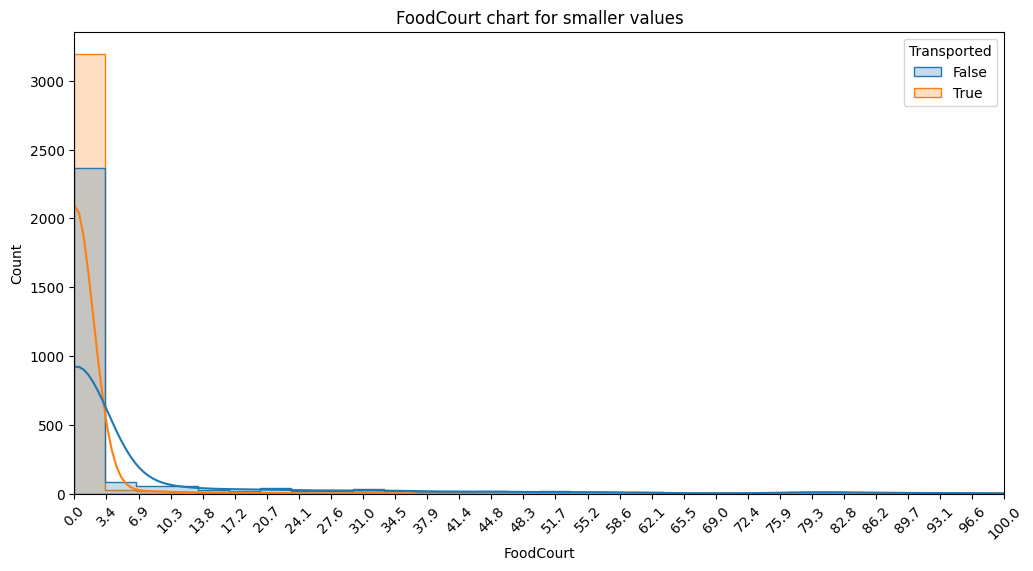

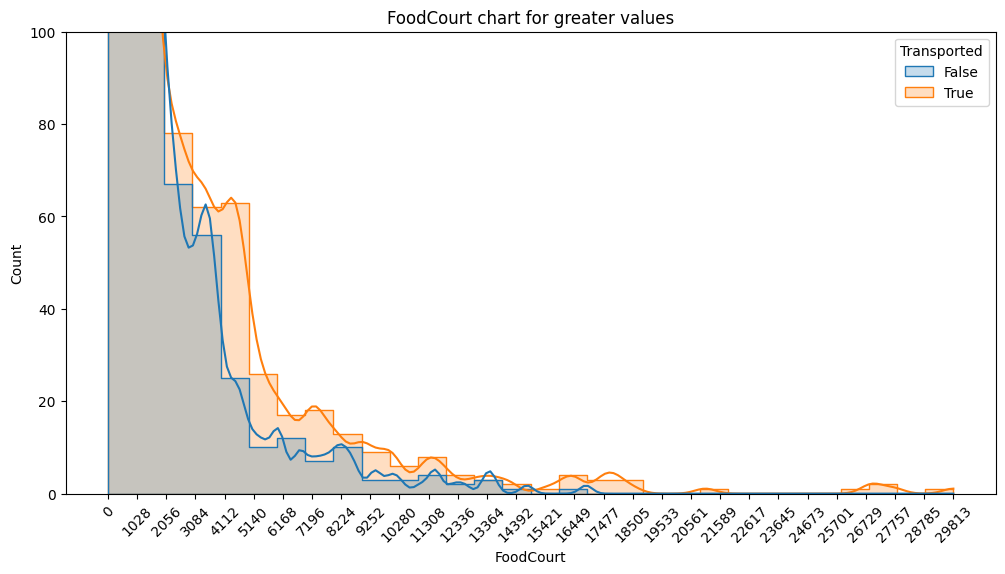

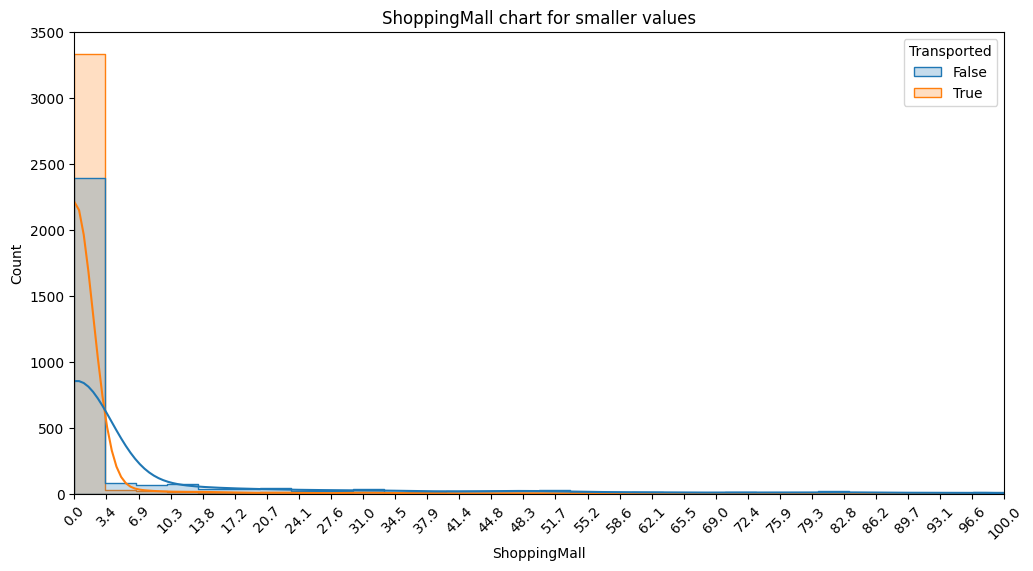

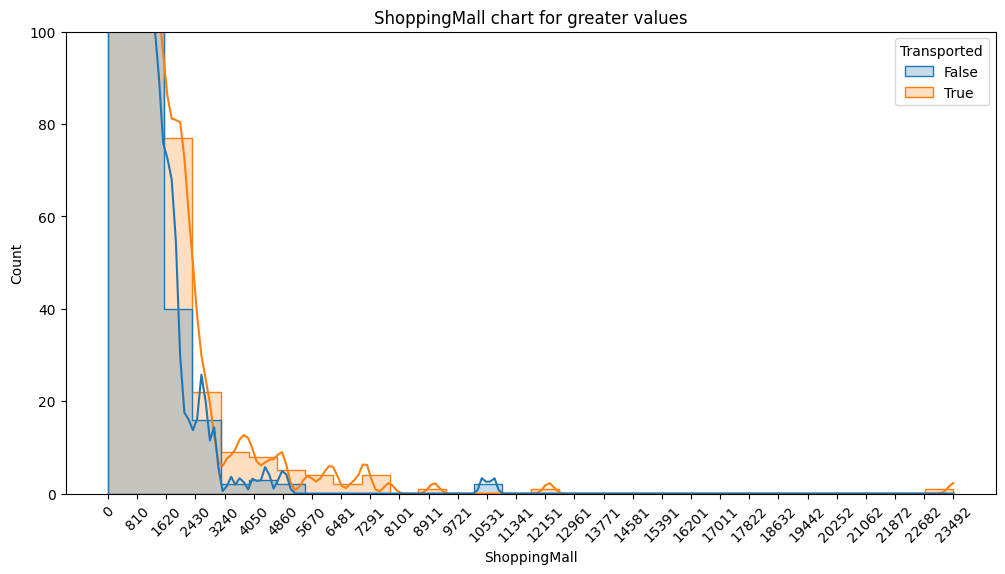

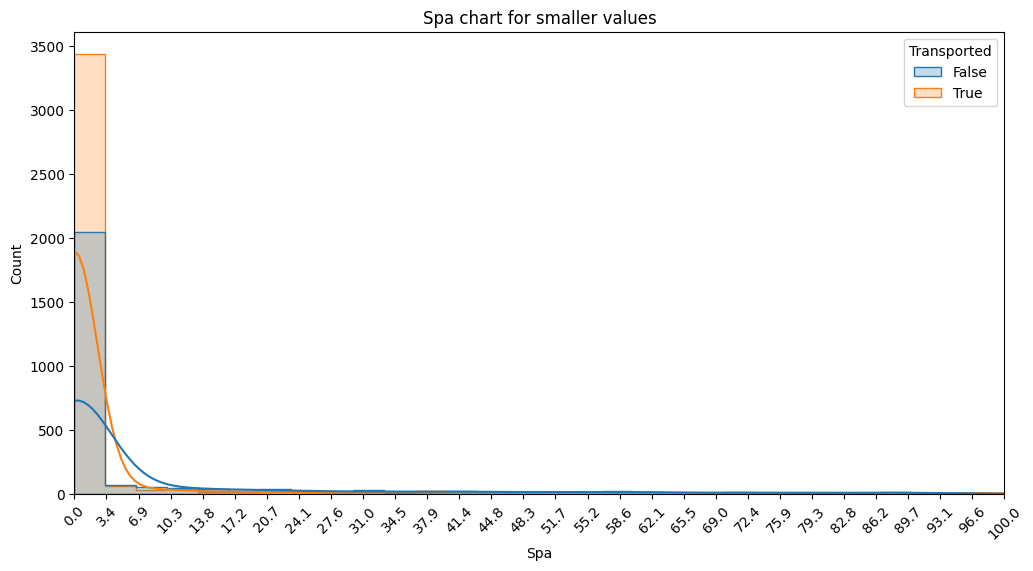

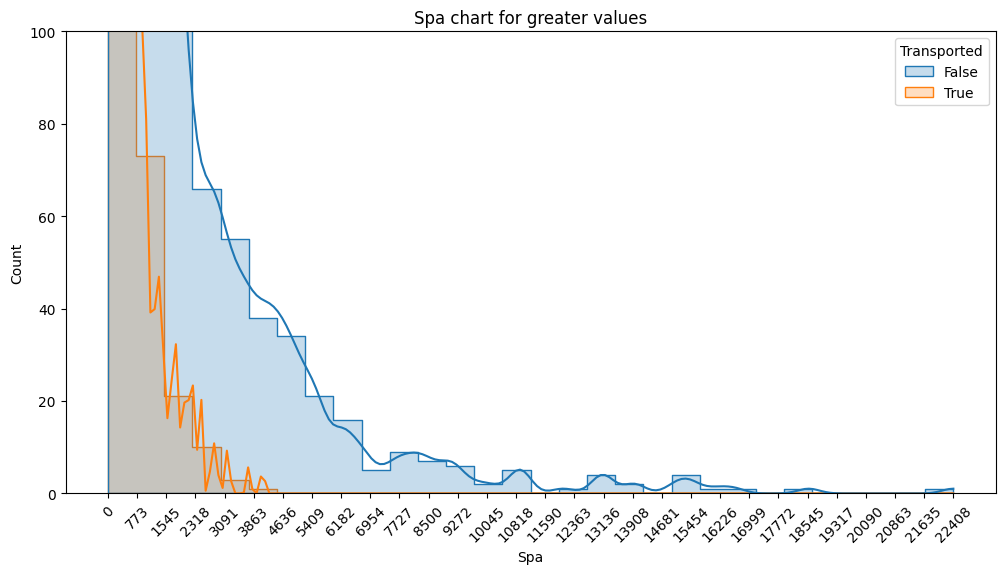

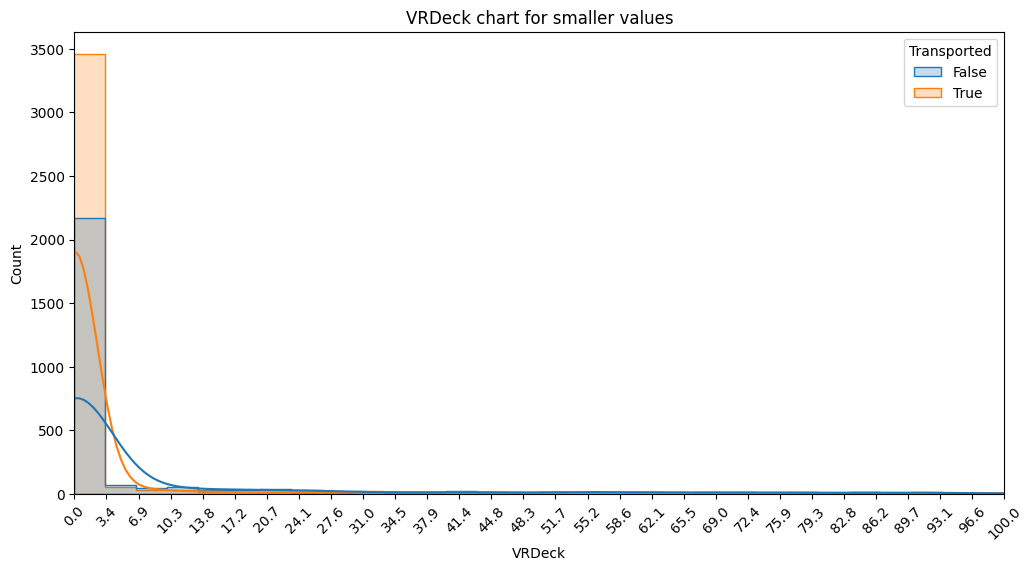

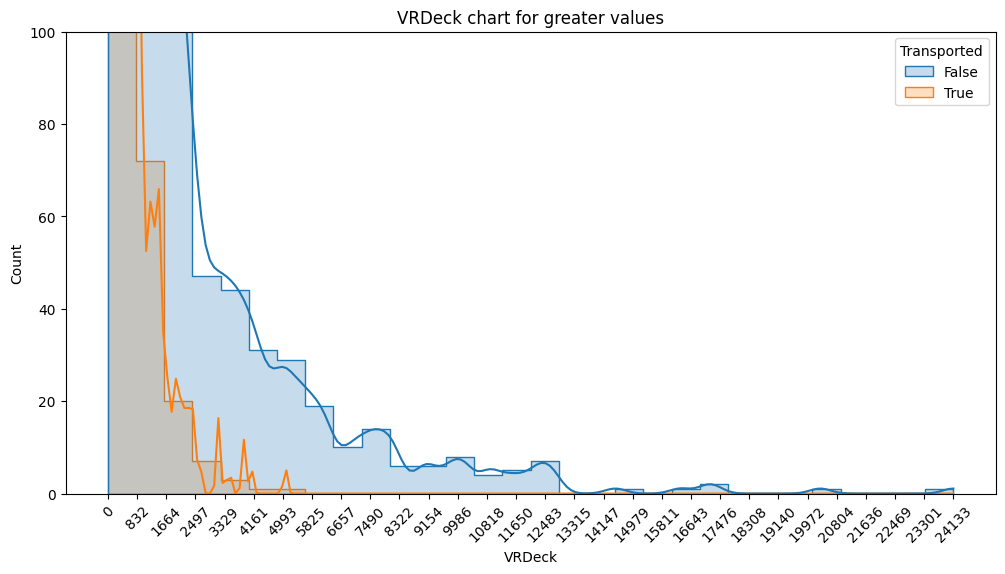

In [31]:
def draw_plot_with_limits(column, limit_x=None, limit_y=None, title="chart"):
    plt.figure(figsize=(12, 6))
    if limit_x:
        data_to_plot = train[train[column] <= limit_x]
    else:
        data_to_plot = train
    number_of_unique = data_to_plot[column].nunique()
    freq_of_most_freq_value = data_to_plot[column].value_counts()[0]
    if number_of_unique > 30:
        ticks = np.linspace(data_to_plot[column].min(), data_to_plot[column].max(), 30)
    else:
        ticks = sorted(data_to_plot[column].unique())
    
    sns.histplot(
        data=data_to_plot,
        x=column,
        hue="Transported",
        kde=True,
        bins=30,
        element="step",
    ).set_xticks(ticks)
    plt.title(f'{column} {title}')
    plt.xticks(rotation=45)
    if limit_y:
        plt.ylim(0, limit_y)
    if limit_x:
        plt.xlim(0, limit_x)
    plt.show()

for column in train_num:
    freq_of_most_freq_value = train[column].value_counts()[0]
    if freq_of_most_freq_value > 1000:
        draw_plot_with_limits(column, limit_x=100, title="chart for smaller values")
        draw_plot_with_limits(column, limit_y=100, title="chart for greater values")
    else:
        draw_plot_with_limits(column)

Let's count expenses of each passenger

In [32]:
spent_columns = ['RoomService', 'Spa', 'VRDeck']
train['Expenses'] = train[spent_columns].sum(axis=1)
train_num['Expenses'] = train['Expenses']

C:\Users\filip\AppData\Local\Temp\ipykernel_24208\1033795087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num['Expenses'] = train['Expenses']


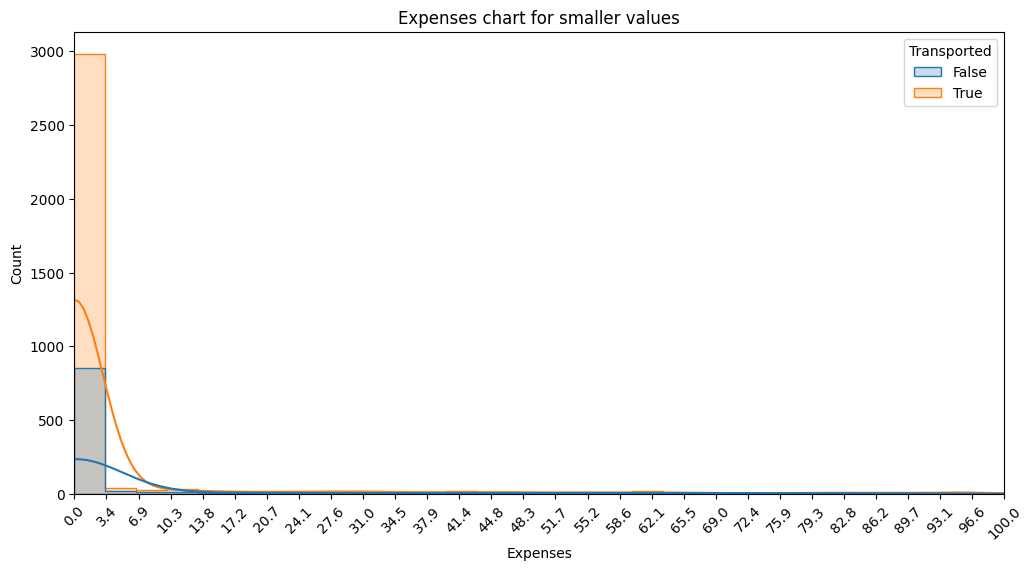

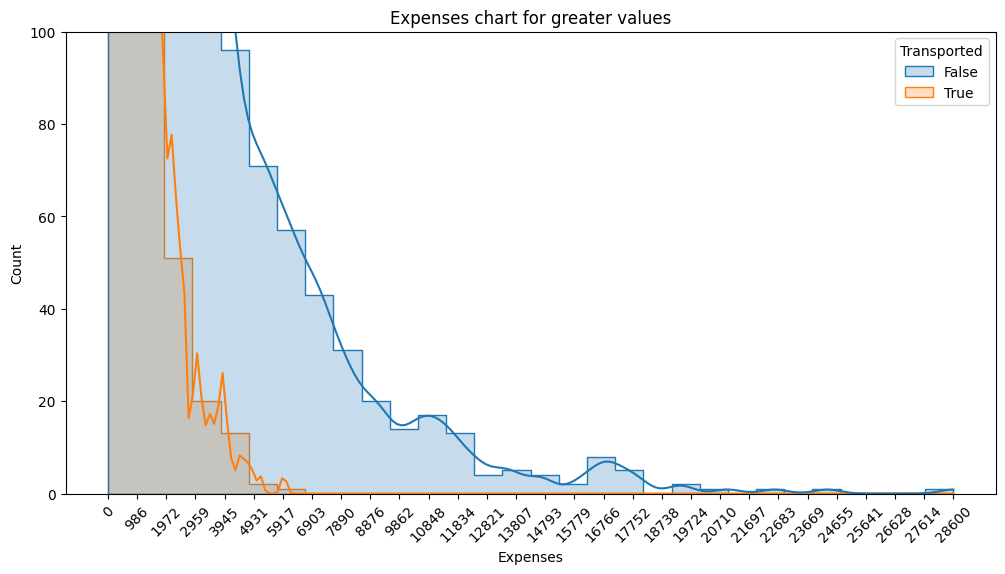

In [33]:
column = 'Expenses'
freq_of_most_freq_value = train[column].value_counts()[0]
if freq_of_most_freq_value > 1000:
    draw_plot_with_limits(column, limit_x=100, title="chart for smaller values")
    draw_plot_with_limits(column, limit_y=100, title="chart for greater values")
else:
    draw_plot_with_limits(column)

Check corelations between expenses and categorical columns

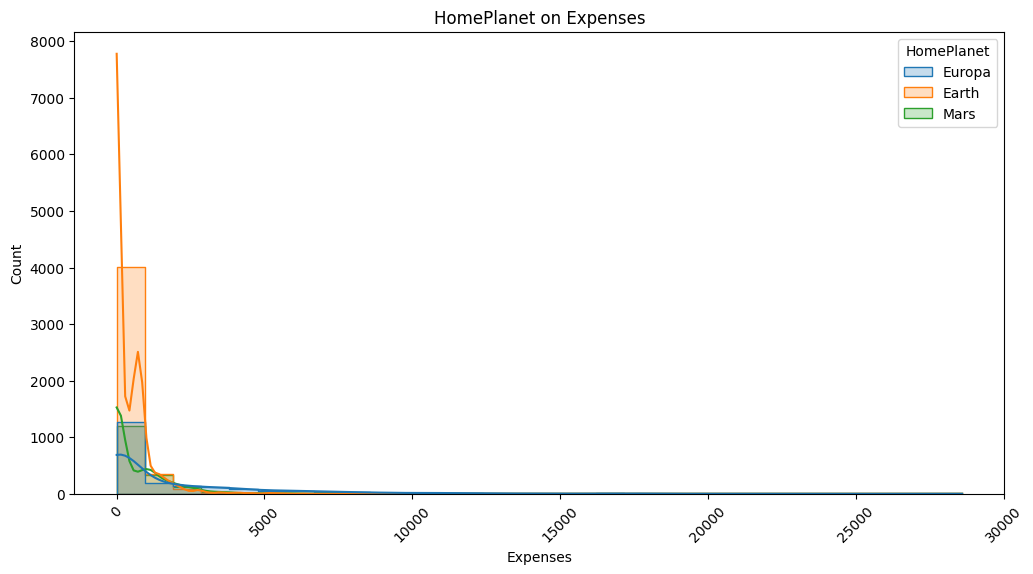

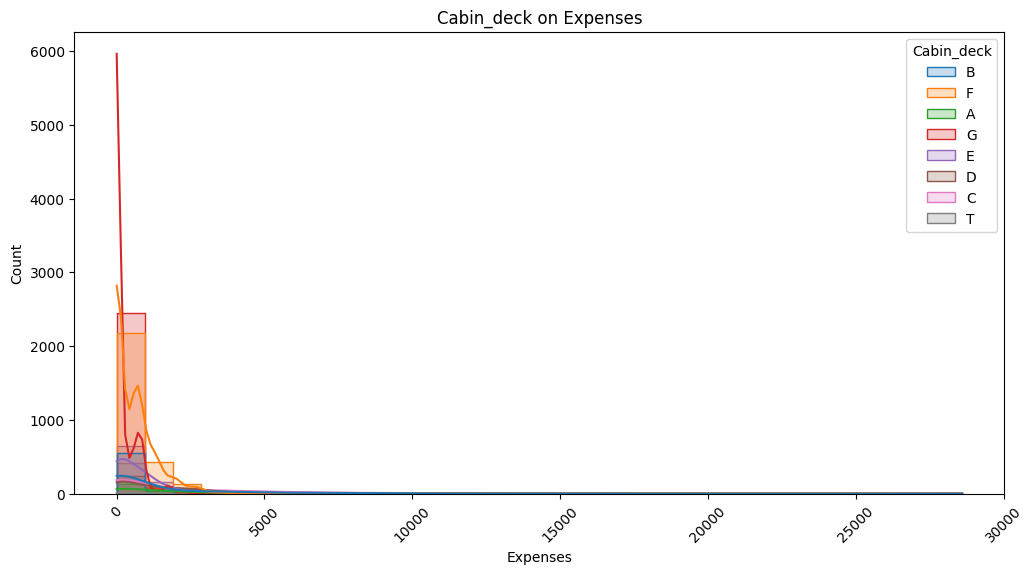

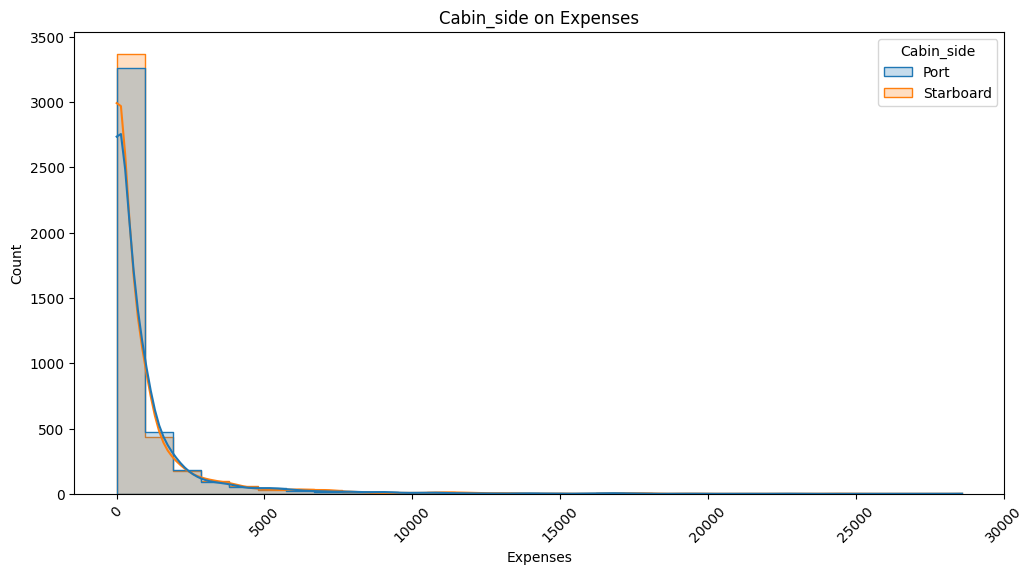

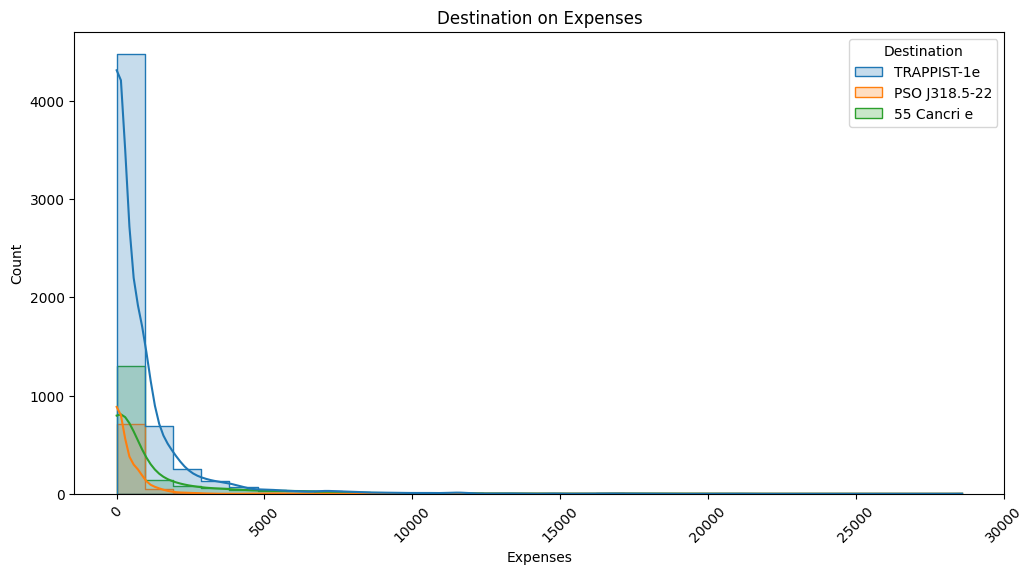

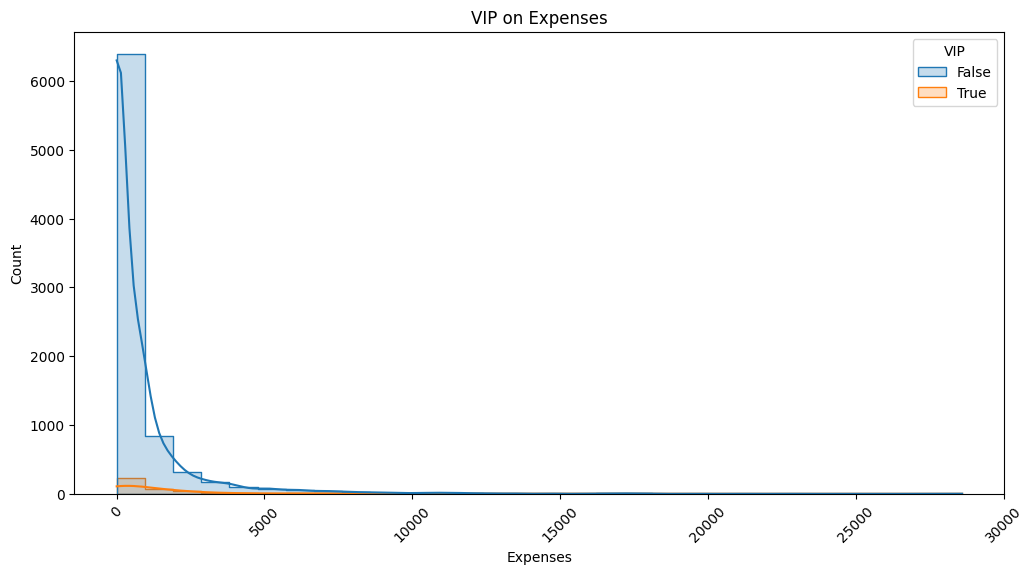

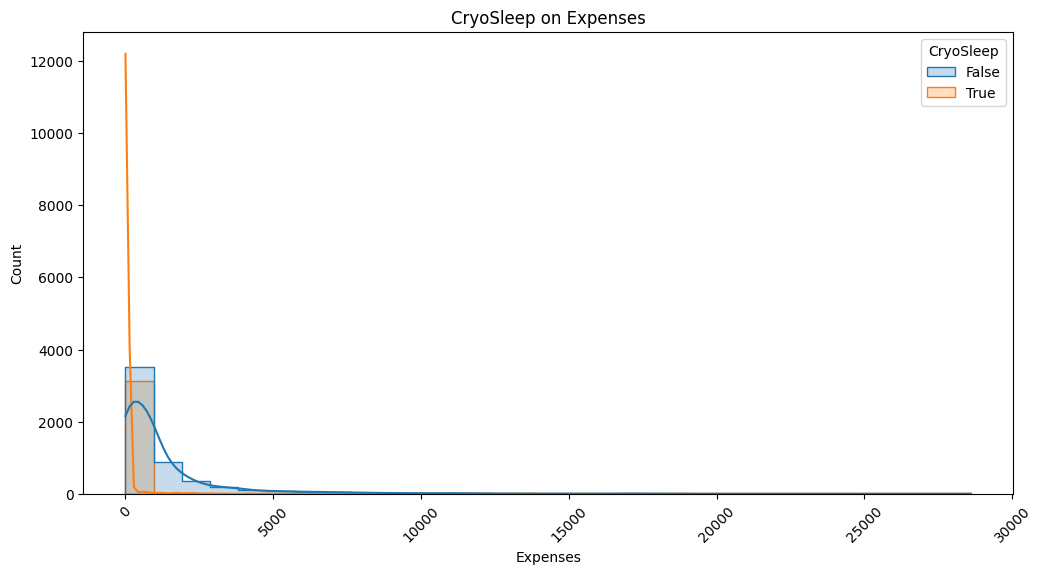

In [34]:
columns_to_check = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP', 'CryoSleep']

for column in columns_to_check:
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=train,
        x="Expenses",
        hue=column,
        kde=True,
        bins=30,
        element="step",
    )
    plt.title(f'{column} on Expenses')
    plt.xticks(rotation=45)
    plt.show()

There is not big impact of categorical data on expenses, except cryosleep, where we can see that people put into cryosleep had significantly less expenses.

#### Boxplot of numerical values

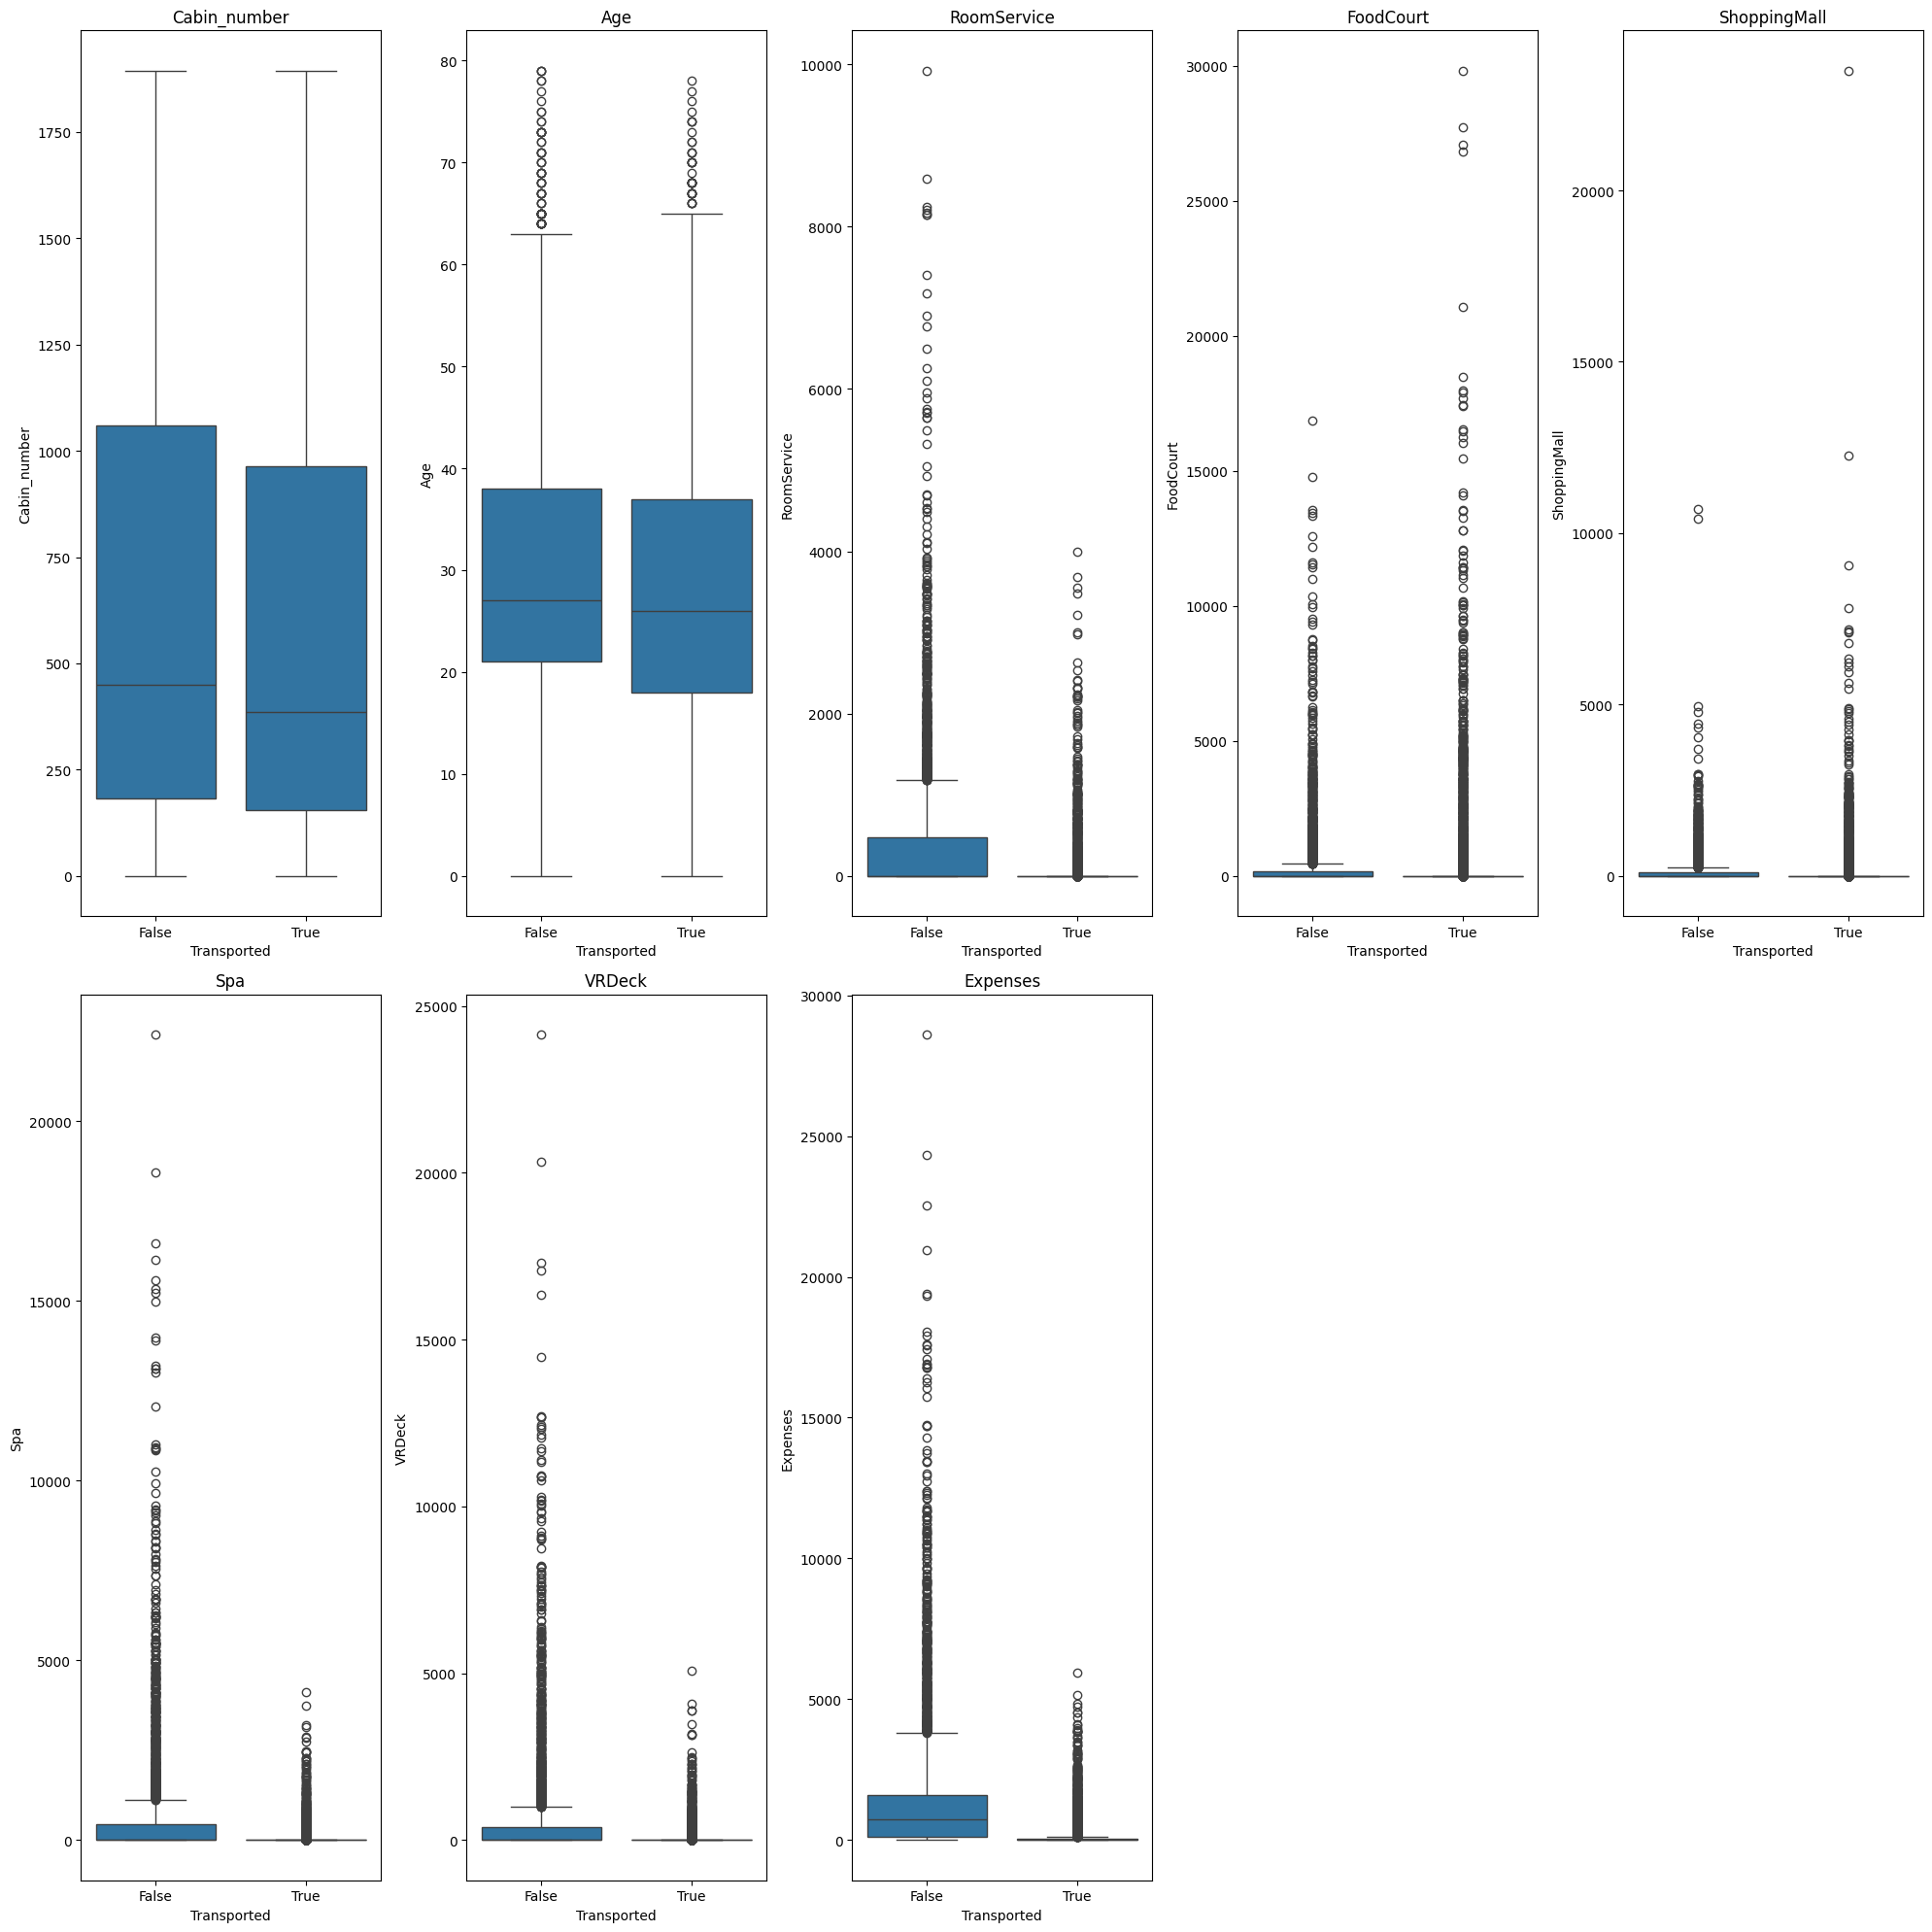

In [35]:
import math
plt.figure(figsize=(20,20))
MAX_WIDTH = 5

for i, column in enumerate(train_num.columns):
    plt.subplot(math.ceil(len(train_num.columns) / MAX_WIDTH), MAX_WIDTH, i + 1)
    sns.boxplot(data=train, x='Transported', y=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

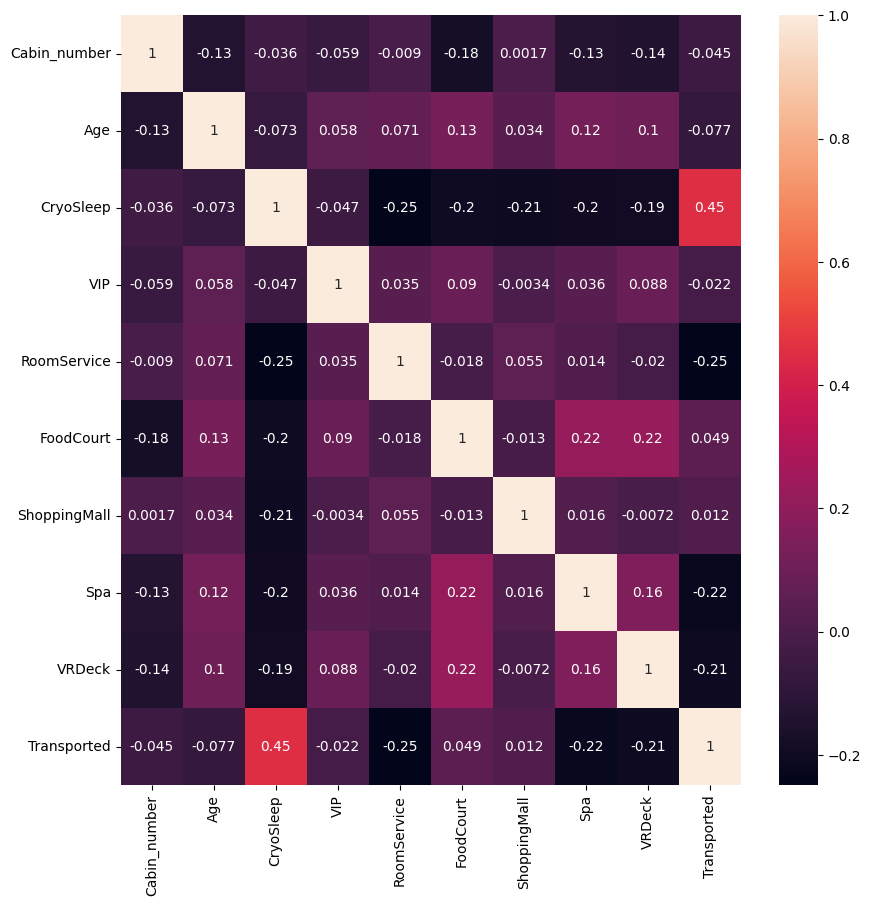

In [36]:
train_tmp = train[['Cabin_number', 'Age','CryoSleep','VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].copy()
train_tmp[['VIP','CryoSleep', 'Transported']] = train_tmp[['VIP','CryoSleep', 'Transported']].astype('int')
plt.figure(figsize = (10,10))
sns.heatmap(train_tmp.corr(),annot = True)
plt.show()

Based on the heatmap, a slight positive correlation can be observed between attributes *CryoSleep* and *Transported*.

## 3. Null handling
To handle null values we are going to test serveral approaches such as:
- deleting null values
- imputation of median, mean or mode

Firstly lets once again analize our dataset.

In [37]:
analize_data(train, "train_data")

Analysis of: train_data
Number of objects:  8494
Number of attributes:  17
Number of objects with at least 1 missing value: 1551
Number of missing values in attributes:
  HomePlanet: 195  (2.30%)
  Destination: 178  (2.10%)
  Age: 175  (2.06%)
  RoomService: 177  (2.08%)
  FoodCourt: 178  (2.10%)
  ShoppingMall: 206  (2.43%)
  Spa: 181  (2.13%)
  VRDeck: 184  (2.17%)
  Name: 198  (2.33%)



At first, drop name column as it is not needed

In [38]:
if "Name" in train.columns:    
    train = train.drop(columns=["Name"])
else:
    print("Column was already removed")

### 1. Delete rows that contains any null value

In [39]:
train_after_deletion = train.dropna(how='any')
analize_data(train_after_deletion, "train_after_deletion")
train_after_deletion.set_index('PassengerId', inplace=True)
print(f'Rows lost because of deletion: {len(train) - len(train_after_deletion)}')

Analysis of: train_after_deletion
Number of objects:  7111
Number of attributes:  16
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:

Rows lost because of deletion: 1383


### 2. Use extended imputation

In order to remove missing data we will perform operations as follows:
- HomePlanet: extended imputation of the mode
- CryoSleep: extended imputation, filling nulls with False
- Destination: extended imputation of the mode
- Age: imputation of the mean
- RoomService: extended imputation of the median
- FoodCourt: extended imputation of the median
- Spa: extended imputation of the median
- VRDeck: extended imputation of the median

In addition to this, we will set PassengerId as index of dataframe.

In [40]:
def create_extended_imputation_extra_column(df, col_names):
  for col_name in col_names:
      if col_name in df.columns:
        df.insert(df.columns.get_loc(col_name)+1, (col_name+'_was_missing'),0)
        df[col_name+'_was_missing']= df[col_name+'_was_missing'].astype('bool')
        df[col_name+'_was_missing']= df[col_name].isnull()
      else:
          print("Attribute %s is not present in specified DataFrame!" % col_name)
          return
  return df

In [41]:
def extended_imputation_with_fill_values(df, col_names, fill_values):
    df = create_extended_imputation_extra_column(df, col_names)
    for i, col_name in enumerate(col_names):
        df[col_name].fillna(fill_values[i], inplace=True)
    return df

In [42]:
from sklearn.impute import SimpleImputer
def extended_imputation_with_strategy(df, col_names, strategy_value):
    df = create_extended_imputation_extra_column(df, col_names)
    imp = SimpleImputer(strategy=strategy_value)
    imp.fit(df[col_names])
    df[col_names]= imp.transform(df[col_names])
    return df

In [43]:
def clean_space_data(df):
    clean_data = df.copy()
    clean_data = clean_data.set_index('PassengerId')
    clean_data = extended_imputation_with_fill_values(clean_data, ['CryoSleep'], [False])
    clean_data = extended_imputation_with_strategy(clean_data, ['HomePlanet', 'Destination'], 'most_frequent')
    clean_data = extended_imputation_with_strategy(clean_data, ['RoomService', 'FoodCourt', 'ShoppingMall',
                                                                'Spa', 'VRDeck'], "median")
    clean_data = extended_imputation_with_strategy(clean_data, ['Age'], 'mean')
    return clean_data
train_after_imputation = clean_space_data(train)
test_after_imputation = clean_space_data(test)


C:\Users\filip\AppData\Local\Temp\ipykernel_24208\3136384779.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(fill_values[i], inplace=True)
C:\Users\filip\AppData\Local\Temp\ipykernel_24208\3136384779.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [44]:
analize_data(train_after_imputation)
train_after_deletion.head()

Analysis of: data
Number of objects:  8494
Number of attributes:  24
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:



,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenses
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B,0,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
0002_01,Earth,False,F,0,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,702.0
0003_01,Europa,False,A,0,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,6807.0
0003_02,Europa,False,A,0,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3522.0
0004_01,Earth,False,F,1,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,870.0


In this way we got rid of missing data and at the same time retained information if particular data was missing.

### 3. Prepare data for testing

In [45]:
from sklearn.preprocessing import OneHotEncoder


def transform_cat_to_num(df, category_list):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    df_encoded = df.copy()
    for column in category_list:
        encoded_array = one_hot_encoder.fit_transform(df[[column]])
        encoded_cols = [f"{column}_{cat}" for cat in one_hot_encoder.categories_[0]]
        col_index = df_encoded.columns.get_loc(column)
        df_encoded = df_encoded.drop(columns=[column])
        for i, col_name in enumerate(encoded_cols):
            df_encoded.insert(col_index + i, col_name, encoded_array[:, i])
    return df_encoded

Fix data types

In [46]:
boolean_columns = ['HomePlanet_was_missing', 'CryoSleep',
       'CryoSleep_was_missing', 'Destination_was_missing', 'Age_was_missing',
       'VIP', 'RoomService_was_missing',
       'FoodCourt_was_missing', 'ShoppingMall_was_missing', 'Spa_was_missing', 'VRDeck_was_missing', 'Transported']
integer_columns = ['Cabin_deck', 'Cabin_number', 'Cabin_side', 'Destination', 'Age',]
float_columns = ['RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck']



categorical_columns_list = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination']
train_after_imputation = transform_cat_to_num(train_after_imputation, categorical_columns_list)
train_after_deletion = transform_cat_to_num(train_after_deletion, categorical_columns_list)

#Set correct data types
for df in [train_after_imputation, train_after_deletion]:
    df[[x for x in boolean_columns if x in df.columns]] = df[[x for x in boolean_columns if x in df.columns]].astype('boolean')
    df[[x for x in integer_columns if x in df.columns]] = df[[x for x in integer_columns if x in df.columns]].astype('int16')
    df[[x for x in float_columns if x in df.columns]] = df[[x for x in float_columns if x in df.columns]].astype('float32')

data_for_testing = [train_after_imputation, train_after_deletion]
data_for_testing = {'train_after_imputation' : train_after_imputation, "train_after_deletion" : train_after_deletion}
train_after_deletion.head()
train_after_imputation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0001_01 to 9280_02
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet_Earth           8494 non-null   float64
 1   HomePlanet_Europa          8494 non-null   float64
 2   HomePlanet_Mars            8494 non-null   float64
 3   HomePlanet_was_missing     8494 non-null   boolean
 4   CryoSleep                  8494 non-null   boolean
 5   CryoSleep_was_missing      8494 non-null   boolean
 6   Cabin_deck_A               8494 non-null   float64
 7   Cabin_deck_B               8494 non-null   float64
 8   Cabin_deck_C               8494 non-null   float64
 9   Cabin_deck_D               8494 non-null   float64
 10  Cabin_deck_E               8494 non-null   float64
 11  Cabin_deck_F               8494 non-null   float64
 12  Cabin_deck_G               8494 non-null   float64
 13  Cabin_deck_T               8494 non-null   f

In [47]:
# Fixed data types
train_after_imputation.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_was_missing,CryoSleep,CryoSleep_was_missing,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,...,FoodCourt,FoodCourt_was_missing,ShoppingMall,ShoppingMall_was_missing,Spa,Spa_was_missing,VRDeck,VRDeck_was_missing,Transported,Expenses
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0.0,1.0,0.0,False,False,False,0.0,1.0,0.0,0.0,...,0.0,False,0.0,False,0.0,False,0.0,False,False,0.0
0002_01,1.0,0.0,0.0,False,False,False,0.0,0.0,0.0,0.0,...,9.0,False,25.0,False,549.0,False,44.0,False,True,702.0
0003_01,0.0,1.0,0.0,False,False,False,1.0,0.0,0.0,0.0,...,3576.0,False,0.0,False,6715.0,False,49.0,False,False,6807.0
0003_02,0.0,1.0,0.0,False,False,False,1.0,0.0,0.0,0.0,...,1283.0,False,371.0,False,3329.0,False,193.0,False,False,3522.0
0004_01,1.0,0.0,0.0,False,False,False,0.0,0.0,0.0,0.0,...,70.0,False,151.0,False,565.0,False,2.0,False,True,870.0


### 4. Feature selection

Function for selecting most significant features

In [48]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
def score_features(data, threshold=-1):
    X = data.drop('Transported', axis=1)
    y = data['Transported']

    if y.dtype == 'object' or y.dtype.name == 'category':
        y = LabelEncoder().fit_transform(y)

    X = pd.get_dummies(X, drop_first=True)

    mi_scores = mutual_info_classif(X, y)
    mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': mi_scores})
    mi_scores_df = mi_scores_df.sort_values(by='Score', ascending=False)
    filtered_scores_df = mi_scores_df[mi_scores_df['Score'] > threshold]

    return filtered_scores_df

#### Feature selection of imputed dataset 

In [49]:
score = score_features(train_after_imputation)
print(score)

                      Feature     Score
34                   Expenses  0.172277
4                   CryoSleep  0.099509
30                        Spa  0.076856
24                RoomService  0.069657
32                     VRDeck  0.067667
28               ShoppingMall  0.048774
26                  FoodCourt  0.042876
8                Cabin_deck_C  0.020061
0            HomePlanet_Earth  0.016990
16       Cabin_side_Starboard  0.012847
14               Cabin_number  0.012842
19    Destination_TRAPPIST-1e  0.011158
1           HomePlanet_Europa  0.010139
29   ShoppingMall_was_missing  0.010005
11               Cabin_deck_F  0.009522
7                Cabin_deck_B  0.008645
23                        VIP  0.008525
5       CryoSleep_was_missing  0.007361
9                Cabin_deck_D  0.006696
21                        Age  0.005926
33         VRDeck_was_missing  0.005637
15            Cabin_side_Port  0.005506
20    Destination_was_missing  0.004385
10               Cabin_deck_E  0.004317


In [50]:
filtered_score = score_features(
    train_after_imputation, threshold=0.03)
print(filtered_score)

         Feature     Score
34      Expenses  0.173532
4      CryoSleep  0.109372
30           Spa  0.088971
24   RoomService  0.066141
32        VRDeck  0.062645
28  ShoppingMall  0.054325
26     FoodCourt  0.038217


#### Feature selection for deleted dataset

In [51]:
score = score_features(
    train_after_deletion, threshold=0.03)
print(score)

         Feature     Score
25      Expenses  0.181085
3      CryoSleep  0.101862
23           Spa  0.088380
20   RoomService  0.079601
24        VRDeck  0.068036
22  ShoppingMall  0.051436
21     FoodCourt  0.046202


Features significance for both imputed and deleted data remains the same.

In [52]:
important_features = filtered_score['Feature'].tolist()
important_features.append('Transported')

Those are the features that are the most useful for classification.

In [216]:
data_for_testing_filtered = {
    'train_after_imputation':data_for_testing['train_after_imputation'][important_features],
    'train_after_deletion':data_for_testing['train_after_deletion'][important_features]
}

#### Our data is ready to go, now we need to specify our models

## Machine learning models

Function for tuning our models:

In [54]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings


def tune_model(model, parameters, data_sets, draw_heatmap=False):
    if not isinstance(data_sets, dict):
        data_sets = {"set":data_sets}
    warnings.filterwarnings("ignore")
    for name, dataframe in data_sets.items():
        gridSearchModel = HalvingGridSearchCV(estimator = model, param_grid=parameters, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5)
        X  = dataframe.drop('Transported', axis=1)
        y = dataframe['Transported']
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)
        gridSearchModel.fit(X_train, y_train)
        print(f"{name} - Found best parameters: {gridSearchModel.best_params_} ({gridSearchModel.best_score_:.4f})")
        if draw_heatmap:
            ConfusionMatrixDisplay.from_estimator(gridSearchModel.best_estimator_, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
            plt.title(f"{model.__class__.__name__}:{name}")
            plt.figtext(0.5, -0.1, 
                      f"accuracy:{accuracy_score(y_valid, gridSearchModel.best_estimator_.predict(X_valid)):.4f}\n"
                      f"roc_auc:{roc_auc_score(y_valid, gridSearchModel.best_estimator_.predict(X_valid)):.4f}", ha="center", fontsize=12)
            plt.grid(False)
            plt.show()

Dictionary for storing model performances:

In [1]:
model_performances = {}

### LogisticRegression

n_iterations: 6
n_required_iterations: 8
n_possible_iterations: 6
min_resources_: 20
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3000
n_resources: 20
Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
----------
iter: 1
n_candidates: 1000
n_resources: 60
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
----------
iter: 2
n_candidates: 334
n_resources: 180
Fitting 5 folds for each of 334 candidates, totalling 1670 fits
----------
iter: 3
n_candidates: 112
n_resources: 540
Fitting 5 folds for each of 112 candidates, totalling 560 fits
----------
iter: 4
n_candidates: 38
n_resources: 1620
Fitting 5 folds for each of 38 candidates, totalling 190 fits
----------
iter: 5
n_candidates: 13
n_resources: 4860
Fitting 5 folds for each of 13 candidates, totalling 65 fits
train_after_imputation - Found best parameters: {'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfg

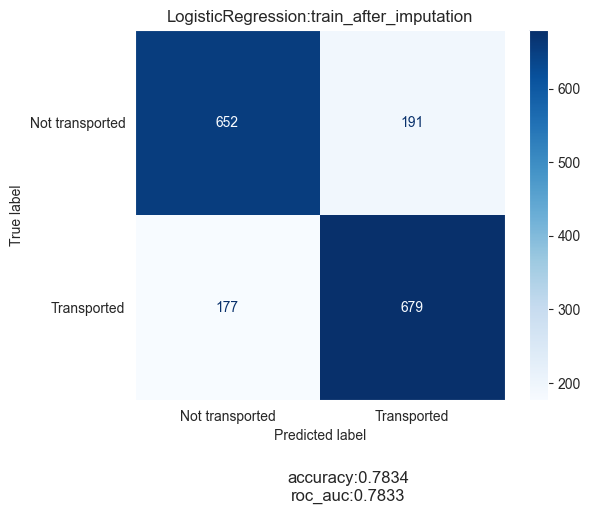

n_iterations: 6
n_required_iterations: 8
n_possible_iterations: 6
min_resources_: 20
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3000
n_resources: 20
Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
----------
iter: 1
n_candidates: 1000
n_resources: 60
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
----------
iter: 2
n_candidates: 334
n_resources: 180
Fitting 5 folds for each of 334 candidates, totalling 1670 fits
----------
iter: 3
n_candidates: 112
n_resources: 540
Fitting 5 folds for each of 112 candidates, totalling 560 fits
----------
iter: 4
n_candidates: 38
n_resources: 1620
Fitting 5 folds for each of 38 candidates, totalling 190 fits
----------
iter: 5
n_candidates: 13
n_resources: 4860
Fitting 5 folds for each of 13 candidates, totalling 65 fits
train_after_deletion - Found best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblin

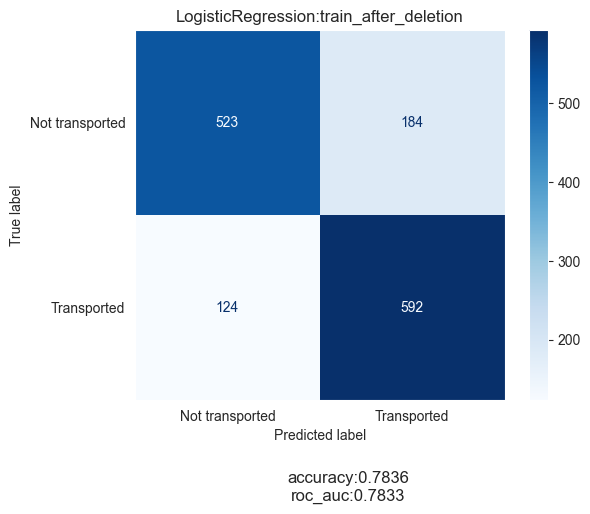

In [221]:
from sklearn.linear_model import LogisticRegression

params = {
    'penalty':
        ['l2','l1','elasticnet',None],
    'C':
        [0.01,0.1,1,10,100],
    'solver':
        ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
    'max_iter':
        [100, 500, 1000],
    'tol':
        [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'class_weight':
        ['balanced', None],
    'random_state' : [0]
}
   
tune_model(LogisticRegression(), params, data_for_testing, draw_heatmap=True)

In [ ]:
model_performances['LogisticRegression:imputation']=0.7834
model_performances['LogisticRegression:deletion']=0.7836

Lets look how we can benefit from filtering the data

n_iterations: 6
n_required_iterations: 8
n_possible_iterations: 6
min_resources_: 20
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3000
n_resources: 20
Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
----------
iter: 1
n_candidates: 1000
n_resources: 60
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
----------
iter: 2
n_candidates: 334
n_resources: 180
Fitting 5 folds for each of 334 candidates, totalling 1670 fits
----------
iter: 3
n_candidates: 112
n_resources: 540
Fitting 5 folds for each of 112 candidates, totalling 560 fits
----------
iter: 4
n_candidates: 38
n_resources: 1620
Fitting 5 folds for each of 38 candidates, totalling 190 fits
----------
iter: 5
n_candidates: 13
n_resources: 4860
Fitting 5 folds for each of 13 candidates, totalling 65 fits
train_after_imputation - Found best parameters: {'C': 100, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'random_state': 0, 'solver':

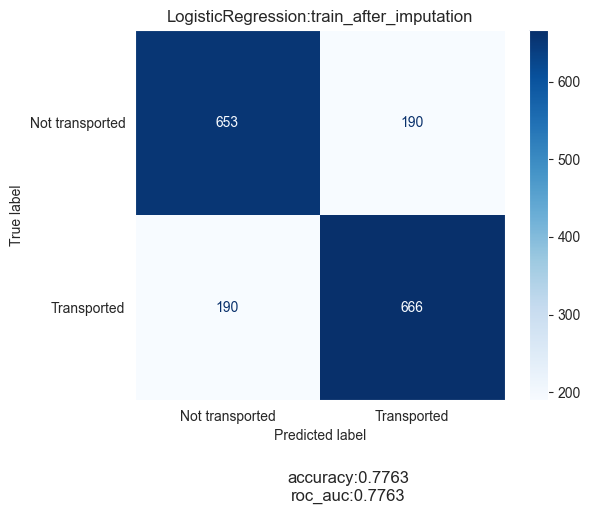

n_iterations: 6
n_required_iterations: 8
n_possible_iterations: 6
min_resources_: 20
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3000
n_resources: 20
Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
----------
iter: 1
n_candidates: 1000
n_resources: 60
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
----------
iter: 2
n_candidates: 334
n_resources: 180
Fitting 5 folds for each of 334 candidates, totalling 1670 fits
----------
iter: 3
n_candidates: 112
n_resources: 540
Fitting 5 folds for each of 112 candidates, totalling 560 fits
----------
iter: 4
n_candidates: 38
n_resources: 1620
Fitting 5 folds for each of 38 candidates, totalling 190 fits
----------
iter: 5
n_candidates: 13
n_resources: 4860
Fitting 5 folds for each of 13 candidates, totalling 65 fits
train_after_deletion - Found best parameters: {'C': 10, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'random_state': 0, 'solver': 'libline

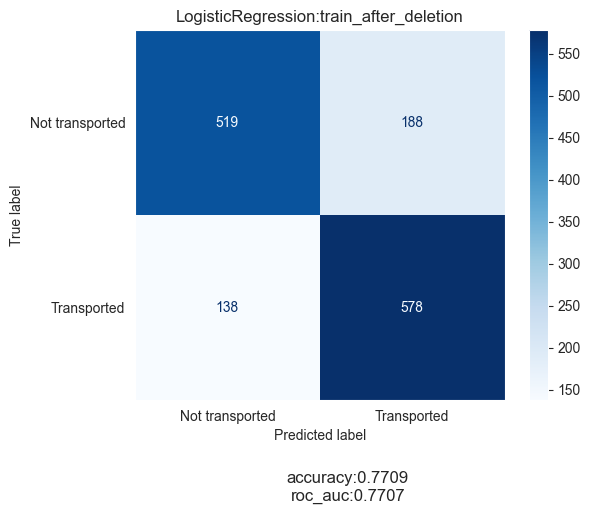

In [222]:
tune_model(LogisticRegression(), params, data_for_testing_filtered, draw_heatmap=True)

In [3]:
model_performances['LogisticRegression:deletion-filtered']=0.7763
model_performances['LogisticRegression:imputation-filtered']=0.7709

## 🏆 Results

### Best Model for Data Without Filtering:
#### **train_after_imputation**
- **C:** 0.1
- **class_weight:** balanced
- **max_iter:** 1000
- **multi_class:** multinomial
- **penalty:** l2
- **random_state:** 0
- **solver:** newton-cg
- **Accuracy:** **0.8714**

#### **train_after_deletion**
- **C:** 10
- **class_weight:** None
- **max_iter:** 1000
- **multi_class:** multinomial
- **penalty:** None
- **random_state:** 0
- **solver:** lbfgs
- **Accuracy:** **0.8743**

---

### Best Model for Filtered Data (Feature Selection Applied):
#### **train_after_imputation**
- **C:** 100
- **class_weight:** balanced
- **max_iter:** 1000
- **multi_class:** ovr
- **penalty:** l2
- **random_state:** 0
- **solver:** newton-cg
- **Accuracy:** **0.8438**

#### **train_after_deletion**
- **C:** 100
- **class_weight:** balanced
- **max_iter:** 1000
- **multi_class:** ovr
- **penalty:** l2
- **random_state:** 0
- **solver:** lbfgs
- **Accuracy:** **0.8457**

### DecisionTreeClassifier

n_iterations: 6
n_required_iterations: 9
n_possible_iterations: 6
min_resources_: 20
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 14400
n_resources: 20
Fitting 5 folds for each of 14400 candidates, totalling 72000 fits
----------
iter: 1
n_candidates: 4800
n_resources: 60
Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
----------
iter: 2
n_candidates: 1600
n_resources: 180
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
----------
iter: 3
n_candidates: 534
n_resources: 540
Fitting 5 folds for each of 534 candidates, totalling 2670 fits
----------
iter: 4
n_candidates: 178
n_resources: 1620
Fitting 5 folds for each of 178 candidates, totalling 890 fits
----------
iter: 5
n_candidates: 60
n_resources: 4860
Fitting 5 folds for each of 60 candidates, totalling 300 fits
train_after_imputation - Found best parameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': None, 'min_impurity_decrease': 0, 

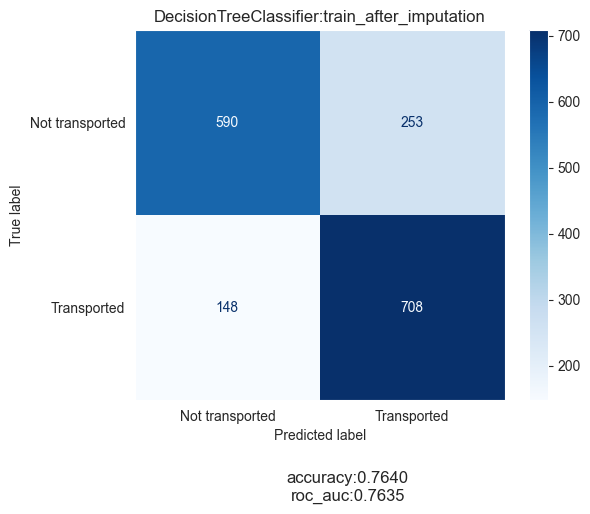

n_iterations: 6
n_required_iterations: 9
n_possible_iterations: 6
min_resources_: 20
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 14400
n_resources: 20
Fitting 5 folds for each of 14400 candidates, totalling 72000 fits
----------
iter: 1
n_candidates: 4800
n_resources: 60
Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
----------
iter: 2
n_candidates: 1600
n_resources: 180
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
----------
iter: 3
n_candidates: 534
n_resources: 540
Fitting 5 folds for each of 534 candidates, totalling 2670 fits
----------
iter: 4
n_candidates: 178
n_resources: 1620
Fitting 5 folds for each of 178 candidates, totalling 890 fits
----------
iter: 5
n_candidates: 60
n_resources: 4860
Fitting 5 folds for each of 60 candidates, totalling 300 fits
train_after_deletion - Found best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_impurity_decrease': 0, 'm

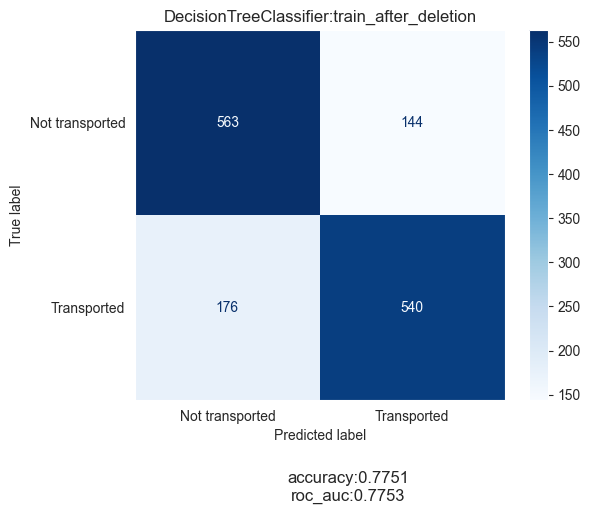

In [224]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [25, 50, 100, None],
    'min_samples_split': [20, 10, 5, 2, 1],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [10, 5, 3, 2, None],
    'min_weight_fraction_leaf': [0, 0.1, 0.2],
    'min_impurity_decrease': [0, 0.02, 0.05],
    'random_state': [0]
}

tune_model(DecisionTreeClassifier(), params, data_for_testing, draw_heatmap=True)

In [5]:
model_performances['DecisionTree:imputation']=0.7640
model_performances['DecisionTree:deletion']=0.7751

n_iterations: 6
n_required_iterations: 9
n_possible_iterations: 6
min_resources_: 20
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 14400
n_resources: 20
Fitting 5 folds for each of 14400 candidates, totalling 72000 fits
----------
iter: 1
n_candidates: 4800
n_resources: 60
Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
----------
iter: 2
n_candidates: 1600
n_resources: 180
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
----------
iter: 3
n_candidates: 534
n_resources: 540
Fitting 5 folds for each of 534 candidates, totalling 2670 fits
----------
iter: 4
n_candidates: 178
n_resources: 1620
Fitting 5 folds for each of 178 candidates, totalling 890 fits
----------
iter: 5
n_candidates: 60
n_resources: 4860
Fitting 5 folds for each of 60 candidates, totalling 300 fits
train_after_imputation - Found best parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 10, 'min_impurity_decrease': 0, 'm

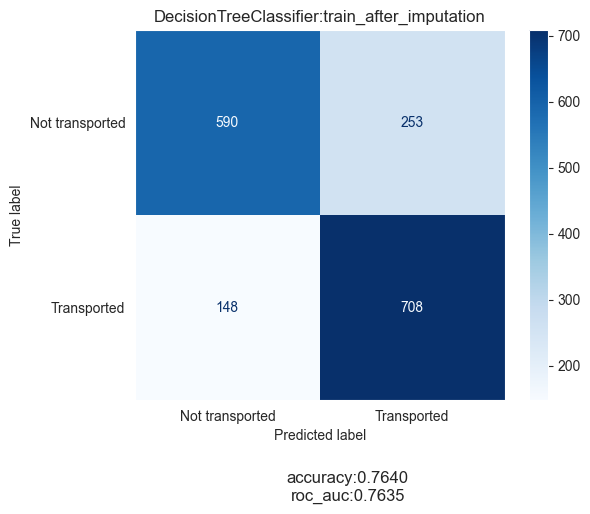

n_iterations: 6
n_required_iterations: 9
n_possible_iterations: 6
min_resources_: 20
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 14400
n_resources: 20
Fitting 5 folds for each of 14400 candidates, totalling 72000 fits
----------
iter: 1
n_candidates: 4800
n_resources: 60
Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
----------
iter: 2
n_candidates: 1600
n_resources: 180
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
----------
iter: 3
n_candidates: 534
n_resources: 540
Fitting 5 folds for each of 534 candidates, totalling 2670 fits
----------
iter: 4
n_candidates: 178
n_resources: 1620
Fitting 5 folds for each of 178 candidates, totalling 890 fits
----------
iter: 5
n_candidates: 60
n_resources: 4860
Fitting 5 folds for each of 60 candidates, totalling 300 fits
train_after_deletion - Found best parameters: {'criterion': 'entropy', 'max_depth': 100, 'max_features': 10, 'min_impurity_decrease': 0, 'mi

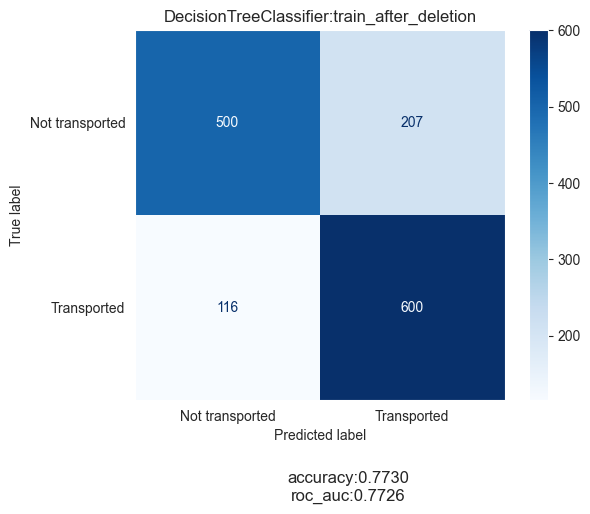

In [225]:
tune_model(DecisionTreeClassifier(), params, data_for_testing_filtered, draw_heatmap=True)

In [6]:
model_performances['DecisionTree:imputation-filtered']=0.7740
model_performances['DecisionTree:deletion-filtered']=0.7730

### RandomForestClassifier

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 27
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 648
n_resources: 27
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
----------
iter: 1
n_candidates: 216
n_resources: 81
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 2
n_candidates: 72
n_resources: 243
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 3
n_candidates: 24
n_resources: 729
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 4
n_candidates: 8
n_resources: 2187
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 6561
Fitting 5 folds for each of 3 candidates, totalling 15 fits
train_after_imputation - Found best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_sampl

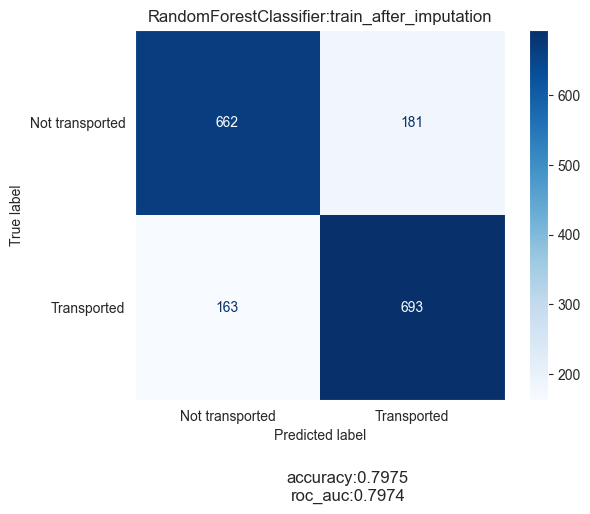

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 23
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 648
n_resources: 23
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
----------
iter: 1
n_candidates: 216
n_resources: 69
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 2
n_candidates: 72
n_resources: 207
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 3
n_candidates: 24
n_resources: 621
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 4
n_candidates: 8
n_resources: 1863
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 5589
Fitting 5 folds for each of 3 candidates, totalling 15 fits
train_after_deletion - Found best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samp

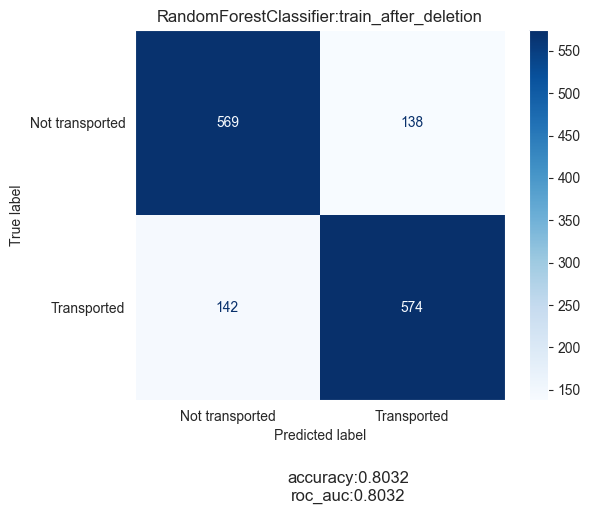

In [228]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [25, 50, 100],  
    'criterion': ['gini', 'entropy'],  
    'max_depth': [10, 25, 50],  
    'min_samples_split': [5, 2],  
    'min_samples_leaf': [2, 5, 10],  
    'max_features': [2, 'sqrt', 'log2'],
    'bootstrap': [True, False],  
    'n_jobs': [-1],
    'random_state': [0]
}

tune_model(RandomForestClassifier(), params, data_for_testing, draw_heatmap=True)

In [7]:
model_performances['RandomForest:imputation']=0.7975
model_performances['RandomForest:deletion']=0.8032

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 27
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 648
n_resources: 27
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
----------
iter: 1
n_candidates: 216
n_resources: 81
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 2
n_candidates: 72
n_resources: 243
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 3
n_candidates: 24
n_resources: 729
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 4
n_candidates: 8
n_resources: 2187
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 6561
Fitting 5 folds for each of 3 candidates, totalling 15 fits
train_after_imputation - Found best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_sampl

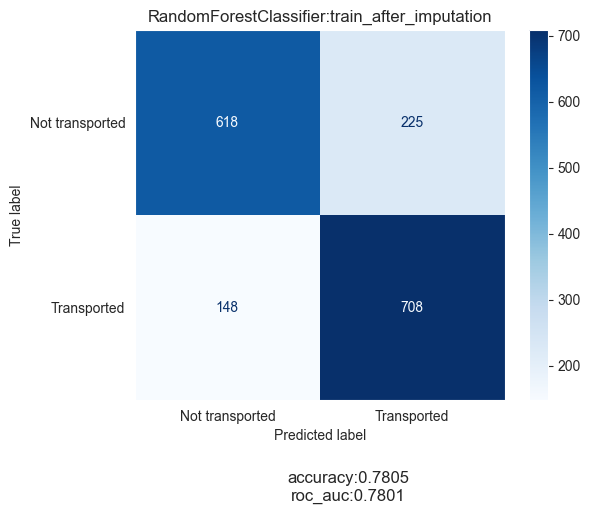

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 23
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 648
n_resources: 23
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
----------
iter: 1
n_candidates: 216
n_resources: 69
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 2
n_candidates: 72
n_resources: 207
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 3
n_candidates: 24
n_resources: 621
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 4
n_candidates: 8
n_resources: 1863
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 5589
Fitting 5 folds for each of 3 candidates, totalling 15 fits
train_after_deletion - Found best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples

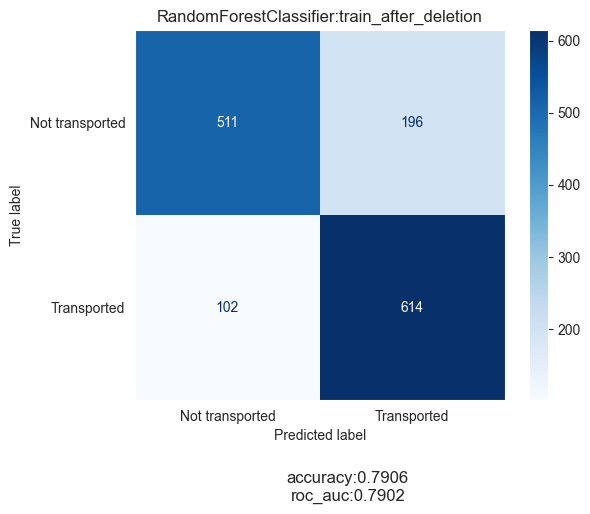

In [229]:
tune_model(RandomForestClassifier(), params, data_for_testing_filtered, draw_heatmap=True)

In [8]:
model_performances['RandomForest:imputation-filtered']=0.7805
model_performances['RandomForest:deletion-filtered']=0.7906

## XGBoost

#### Function for evaluating model

In [230]:
def tune_xgb_model(XGBmodel, params, data):
    X = data.drop('Transported', axis=1)
    y = data['Transported']
    X_train, X_valid, y_train, y_valid = (
        train_test_split(X, y, train_size=0.8, test_size=0.2,
                         random_state=0, stratify=y))
    optimal_params = (
        HalvingGridSearchCV(estimator=XGBmodel, param_grid=params,
                            scoring='roc_auc', verbose=1, n_jobs=-1, cv=5))
    optimal_params.fit(X_train, y_train,
                       eval_set=[(X_valid, y_valid)], verbose=0)
    print(f"Found best parameters: {optimal_params.best_params_}"
          f" ({optimal_params.best_score_:.4f})")
    return optimal_params

#### Using data after imputation without any missing data

In [235]:
import xgboost as xgb

XGBmodel = xgb.XGBClassifier(objective='binary:logistic', seed=0, subsample=0.9, colsample_bytree= 0.5, eval_metric='auc', early_stopping_rounds= 10)

# # TEST 1
params = {
    'n_estimators': [20,50,100],
    'max_depth': [3,7,12],
    'min_child_weight': [1,3,5,10],
    'learning_rate': [0.01,0.05,0.1],
    'gamma': [0,0.5,1],
    'reg_alpha': [0,0.5,1],
    'reg_lambda': [0.1,1,10],
    'scale_pos_weight': [1,2,5]
}

# tune_xgb_model(XGBmodel, params, train_after_imputation)
# OUTPUT: Found best parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'scale_pos_weight': 1}

# # TEST 2
params = {
    'n_estimators': [100,150,200],
    'max_depth': [6,7,8],
    'min_child_weight': [1,3],
    'learning_rate': [0.1, 0.15],
    'gamma': [1, 1.5, 2],
    'reg_alpha': [0.2,0.5,0.7],
    'reg_lambda': [1,2],
    'scale_pos_weight': [1,2]
}

# tune_xgb_model(XGBmodel, params, train_after_imputation)
# # OUTPUT: Found best parameters: {'gamma': 1.5, 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.7, 'reg_lambda': 1, 'scale_pos_weight': 1} (0.9032)

# # TEST 3
params = {
    'n_estimators': [100,125],
    'max_depth': [8,9],
    'min_child_weight': [1], #Optimal
    'learning_rate': [0.15, 0.2, 0.25],
    'gamma': [1.5], #Optimal
    'reg_alpha': [0.6,0.7,0.9],
    'reg_lambda': [1,2,5],
    'scale_pos_weight': [1] #Optimal
}

# tune_xgb_model(XGBmodel, params, train_after_imputation)
# # OUTPUT: Found best parameters: {'gamma': 1.5, 'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 125, 'reg_alpha': 0.6, 'reg_lambda': 5, 'scale_pos_weight': 1} (0.9052)

# # TEST 4
params = {
    'n_estimators': [125],
    'max_depth': [9,10,11],
    'min_child_weight': [1], #Optimal
    'learning_rate': [0.2, 0.25],
    'gamma': [1.5], #Optimal
    'reg_alpha': [0.6],
    'reg_lambda': [5,7,9],
    'scale_pos_weight': [1] #Optimal
}

# tune_xgb_model(XGBmodel, params, train_after_imputation)
# # OUTPUT: Found best parameters:  {'gamma': 1.5, 'learning_rate': 0.2, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 125, 'reg_alpha': 0.6, 'reg_lambda': 7, 'scale_pos_weight': 1} (0.9044)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 755
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 18
n_resources: 755
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 1
n_candidates: 6
n_resources: 2265
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 2
n_resources: 6795
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Found best parameters: {'gamma': 1.5, 'learning_rate': 0.2, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 125, 'reg_alpha': 0.6, 'reg_lambda': 7, 'scale_pos_weight': 1} (0.9044)


HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=10,
                                            enable_categorical=False,
                                            eval_metric='auc',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'gamma': [1.5], 'learning_rate': [0.2, 0.25],
                                'max_depth': [9, 10, 11],
                                'min_child_weight': [1], 'n_estimators': [125],
                                'reg_alpha': [0.6], 'reg_lambda': [5, 7, 9],
                                'scale_pos_weight': [1]},
                    scoring='roc_auc', verbose=1)

Based on tests optimal parameters are: {'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150, 'reg_alpha': 2, 'reg_lambda': 0.1, 'scale_pos_weight': 5} with score 0.8996

Next we will apply these parameters to model operating on full data.

[0]	validation_0-aucpr:0.87553
[1]	validation_0-aucpr:0.87950
[2]	validation_0-aucpr:0.88218
[3]	validation_0-aucpr:0.88975
[4]	validation_0-aucpr:0.89045
[5]	validation_0-aucpr:0.89121
[6]	validation_0-aucpr:0.89336
[7]	validation_0-aucpr:0.89450
[8]	validation_0-aucpr:0.89625
[9]	validation_0-aucpr:0.89779
[10]	validation_0-aucpr:0.89907
[11]	validation_0-aucpr:0.90087
[12]	validation_0-aucpr:0.90167
[13]	validation_0-aucpr:0.90201
[14]	validation_0-aucpr:0.90399
[15]	validation_0-aucpr:0.90546
[16]	validation_0-aucpr:0.90542
[17]	validation_0-aucpr:0.90576
[18]	validation_0-aucpr:0.90644
[19]	validation_0-aucpr:0.90728
[20]	validation_0-aucpr:0.90758
[21]	validation_0-aucpr:0.90827
[22]	validation_0-aucpr:0.90842
[23]	validation_0-aucpr:0.90907
[24]	validation_0-aucpr:0.90904
[25]	validation_0-aucpr:0.90922
[26]	validation_0-aucpr:0.90924
[27]	validation_0-aucpr:0.90924
[28]	validation_0-aucpr:0.90924
[29]	validation_0-aucpr:0.90924
[30]	validation_0-aucpr:0.90924
[31]	validation_0-

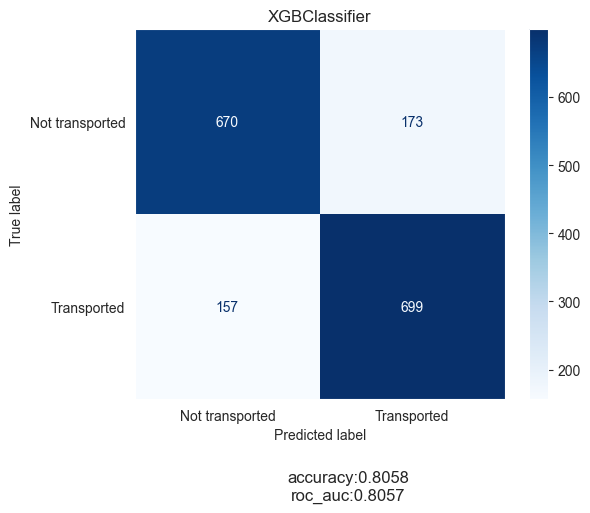

In [236]:
from sklearn.metrics import ConfusionMatrixDisplay


X = train_after_imputation.drop('Transported', axis=1)
y = train_after_imputation['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = xgb.XGBClassifier(
    seed=0,
    objective='binary:logistic',
    gamma= 1.5,
    learning_rate=0.2,
    max_depth= 9,
    min_child_weight= 1,
    n_estimators=125,
    reg_alpha= 0.6,
    reg_lambda=5,
    scale_pos_weight=1,
    eval_metric= 'aucpr'
)

model.fit(X_train, y_train, verbose=1, eval_set=[(X_valid, y_valid)])

disp_imputed = ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.title(f"{model.__class__.__name__}")
plt.figtext(0.5, -0.1, 
    f"accuracy:{accuracy_score(y_valid, model.predict(X_valid)):.4f}\n"
    f"roc_auc:{roc_auc_score(y_valid, model.predict(X_valid)):.4f}", ha="center", fontsize=12)
plt.grid(False)
plt.show()

In [9]:
model_performances['XGBoost:imputation']=0.8085

#### Using data after deletion of objects with missing values

In [239]:
import xgboost as xgb


XGBmodel = xgb.XGBClassifier(objective='binary:logistic', seed=0, subsample=0.9, colsample_bytree= 0.5, eval_metric='auc', early_stopping_rounds= 10)

# # TEST 1
params = {
    'n_estimators': [20,50,100],
    'max_depth': [3,7,12],
    'min_child_weight': [1,3,5,10],
    'learning_rate': [0.01,0.05,0.1],
    'gamma': [0,0.5,1],
    'reg_alpha': [0,0.5,1],
    'reg_lambda': [0.1,1,10],
    'scale_pos_weight': [1,2,5]
}

# tune_xgb_model(XGBmodel, params, train_after_deletion)
# # OUTPUT: Found best parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'scale_pos_weight': 1} (0.9020)

# # TEST 2
params = {
    'n_estimators': [100,150,200],
    'max_depth': [6,7,9],
    'min_child_weight': [1,2],
    'learning_rate': [0.1,0.15,0.25],
    'gamma': [1,2,3],
    'reg_alpha': [0.3,0.5,0.7],
    'reg_lambda': [0.01,0.05,0.1],
    'scale_pos_weight': [1]
}

# tune_xgb_model(XGBmodel, params, train_after_deletion)
# # OUTPUT: Found best parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.3, 'reg_lambda': 0.1, 'scale_pos_weight': 1} (0.8985)

Based on tests optimal parameters are: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'scale_pos_weight': 2} with score 0.9014

Accordingly, we will test model on full data.

[0]	validation_0-aucpr:0.90893
[1]	validation_0-aucpr:0.90981
[2]	validation_0-aucpr:0.91208
[3]	validation_0-aucpr:0.91184
[4]	validation_0-aucpr:0.91291
[5]	validation_0-aucpr:0.91275
[6]	validation_0-aucpr:0.91369
[7]	validation_0-aucpr:0.91479
[8]	validation_0-aucpr:0.91493
[9]	validation_0-aucpr:0.91544
[10]	validation_0-aucpr:0.91580
[11]	validation_0-aucpr:0.91577
[12]	validation_0-aucpr:0.91543
[13]	validation_0-aucpr:0.91542
[14]	validation_0-aucpr:0.91518
[15]	validation_0-aucpr:0.91564
[16]	validation_0-aucpr:0.91584
[17]	validation_0-aucpr:0.91591
[18]	validation_0-aucpr:0.91614
[19]	validation_0-aucpr:0.91629
[20]	validation_0-aucpr:0.91644
[21]	validation_0-aucpr:0.91680
[22]	validation_0-aucpr:0.91887
[23]	validation_0-aucpr:0.91932
[24]	validation_0-aucpr:0.91952
[25]	validation_0-aucpr:0.91968
[26]	validation_0-aucpr:0.92003
[27]	validation_0-aucpr:0.92019
[28]	validation_0-aucpr:0.92069
[29]	validation_0-aucpr:0.92098
[30]	validation_0-aucpr:0.92102
[31]	validation_0-

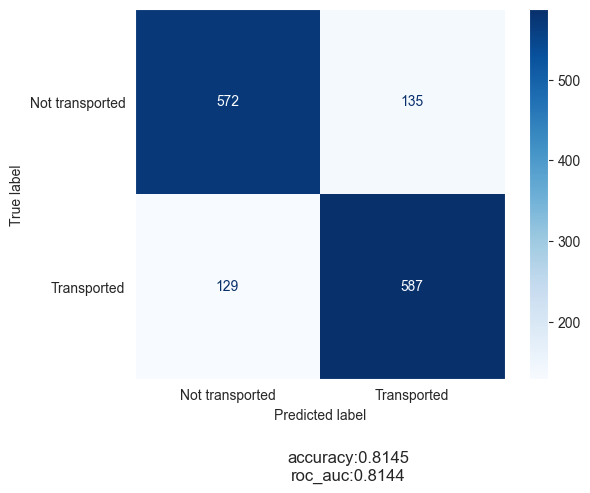

In [240]:
from sklearn.metrics import ConfusionMatrixDisplay


X = train_after_deletion.drop('Transported', axis=1)
y = train_after_deletion['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = xgb.XGBClassifier(
    seed=0,
    objective='binary:logistic',
    eval_metric= 'aucpr',
    gamma= 1,
    learning_rate= 0.1,
    max_depth= 7,
    min_child_weight= 1,
    n_estimators= 100,
    reg_alpha= 0.5,
    reg_lambda= 0.1,
    scale_pos_weight= 1
)

model.fit(X_train, y_train, verbose=1, eval_set=[(X_valid, y_valid)])

disp_deleted = ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.figtext(0.5, -0.1, 
    f"accuracy:{accuracy_score(y_valid, model.predict(X_valid)):.4f}\n"
    f"roc_auc:{roc_auc_score(y_valid, model.predict(X_valid)):.4f}", ha="center", fontsize=12)
plt.grid(False)
plt.show()

In [10]:
model_performances['XGBoost:deletion']=0.8145

#### Using One-hot encoding

Preparing data for XGBoost. Performing One-hot encoding.

In [241]:
df = train.copy()
df.set_index('PassengerId', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8299 non-null   object 
 1   CryoSleep     8494 non-null   bool   
 2   Cabin_deck    8494 non-null   object 
 3   Cabin_number  8494 non-null   int64  
 4   Cabin_side    8494 non-null   object 
 5   Destination   8316 non-null   object 
 6   Age           8319 non-null   float64
 7   VIP           8494 non-null   bool   
 8   RoomService   8317 non-null   float64
 9   FoodCourt     8316 non-null   float64
 10  ShoppingMall  8288 non-null   float64
 11  Spa           8313 non-null   float64
 12  VRDeck        8310 non-null   float64
 13  Transported   8494 non-null   bool   
 14  Expenses      8494 non-null   float64
dtypes: bool(3), float64(7), int64(1), object(4)
memory usage: 887.6+ KB


In [243]:
analize_data(df, "original data")
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
float_columns = ['RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck', 'Expenses','Cabin_number','Age']
category_columns = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination']
df.replace(' ', '_', regex=True, inplace=True)
#Set correct data types
df[boolean_columns] = df[boolean_columns].astype('boolean')
df[float_columns] = df[float_columns].astype('float32')

df.info()
df.head()

Analysis of: original data
Number of objects:  8494
Number of attributes:  15
Number of objects with at least 1 missing value: 1383
Number of missing values in attributes:
  HomePlanet: 195  (2.30%)
  Destination: 178  (2.10%)
  Age: 175  (2.06%)
  RoomService: 177  (2.08%)
  FoodCourt: 178  (2.10%)
  ShoppingMall: 206  (2.43%)
  Spa: 181  (2.13%)
  VRDeck: 184  (2.17%)

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8299 non-null   object 
 1   CryoSleep     8494 non-null   boolean
 2   Cabin_deck    8494 non-null   object 
 3   Cabin_number  8494 non-null   float32
 4   Cabin_side    8494 non-null   object 
 5   Destination   8316 non-null   object 
 6   Age           8319 non-null   float32
 7   VIP           8494 non-null   boolean
 8   RoomService   8317 non-null   float32
 9   FoodCourt     8316 non-null   float32

,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenses
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B,0.0,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
0002_01,Earth,False,F,0.0,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,702.0
0003_01,Europa,False,A,0.0,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,6807.0
0003_02,Europa,False,A,0.0,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3522.0
0004_01,Earth,False,F,1.0,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,870.0


In [244]:
df_encoded = pd.get_dummies(df, columns=category_columns)
df_encoded.head()

,CryoSleep,Cabin_number,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_Port,Cabin_side_Starboard,Destination_55_Cancri_e,Destination_PSO_J318.5-22,Destination_TRAPPIST-1e
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,False,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,False,False,False,False,False,True,False,False,False,True
0002_01,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,False,False,True,False,False,False,True,False,False,True
0003_01,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,False,False,False,False,False,False,True,False,False,True
0003_02,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,False,False,False,False,False,False,True,False,False,True
0004_01,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,False,False,True,False,False,False,True,False,False,True


Finding optimal parameters

In [248]:
XGBmodel = xgb.XGBClassifier(objective='binary:logistic', seed=0, subsample=0.9, colsample_bytree= 0.5, eval_metric='auc', early_stopping_rounds= 10, missing=np.nan)

# # TEST 1
params = {
    'n_estimators': [20,50,100],
    'max_depth': [3,7,12],
    'min_child_weight': [1,3,5,10],
    'learning_rate': [0.01,0.05,0.1],
    'gamma': [0,0.5,1],
    'reg_alpha': [0,0.5,1],
    'reg_lambda': [0.1,1,10],
    'scale_pos_weight': [1,2,5]
}

# tune_xgb_model(XGBmodel, params, train_after_deletion)
# # OUTPUT: Found best parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'scale_pos_weight': 1}

# # TEST 2
params = {
    'n_estimators': [100,150,200],
    'max_depth': [6,7,8],
    'min_child_weight': [3,5],
    'learning_rate': [0.05,0.1, 0.3],
    'gamma': [1,1.5,2],
    'reg_alpha': [0.25,0.5],
    'reg_lambda': [1,2,3],
    'scale_pos_weight': [1,2]
}

# tune_xgb_model(XGBmodel, params, train_after_deletion)
# # OUTPUT: Found best parameters: {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'scale_pos_weight': 2} (0.8979)

# # TEST 3
params = {
    'n_estimators': [100,125],
    'max_depth': [7],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'gamma': [2,3,4],
    'reg_alpha': [0.5,0.75],
    'reg_lambda': [0.5,1],
    'scale_pos_weight': [1,2,3]
}

# tune_xgb_model(XGBmodel, params, train_after_deletion)
# # OUTPUT: Found best parameters: {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.75, 'reg_lambda': 1, 'scale_pos_weight': 3} (0.9003)

# # TEST 4
params = {
    'n_estimators': [100],
    'max_depth': [7],
    'min_child_weight': [3],
    'learning_rate': [0.075,0.1],
    'gamma': [2,3,4],
    'reg_alpha': [0.5,0.75],
    'reg_lambda': [1],
    'scale_pos_weight': [2,3,4,5,6]
}

tune_xgb_model(XGBmodel, params, train_after_deletion)
# # OUTPUT: Found best parameters: {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'scale_pos_weight': 2} (0.9000)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 210
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 60
n_resources: 210
Fitting 5 folds for each of 60 candidates, totalling 300 fits
----------
iter: 1
n_candidates: 20
n_resources: 630
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 2
n_candidates: 7
n_resources: 1890
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 5670
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Found best parameters: {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'scale_pos_weight': 2} (0.9000)


HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=10,
                                            enable_categorical=False,
                                            eval_metric='auc',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'gamma': [2, 3, 4],
                                'learning_rate': [0.075, 0.1], 'max_depth': [7],
                                'min_child_weight': [3], 'n_estimators': [100],
                                'reg_alpha': [0.5, 0.75], 'reg_lambda': [1],
                                'scale_pos_weight': [2, 3, 4, 5, 6]},
                    scoring='roc_auc', verbose=1)

Optimal parameters found via test: {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'scale_pos_weight': 1} with score 0.9004

Model using full data

[0]	validation_0-aucpr:0.87842
[1]	validation_0-aucpr:0.87832
[2]	validation_0-aucpr:0.87862
[3]	validation_0-aucpr:0.87892
[4]	validation_0-aucpr:0.88040
[5]	validation_0-aucpr:0.88059
[6]	validation_0-aucpr:0.88154
[7]	validation_0-aucpr:0.88987
[8]	validation_0-aucpr:0.89130
[9]	validation_0-aucpr:0.89198
[10]	validation_0-aucpr:0.89292
[11]	validation_0-aucpr:0.89331
[12]	validation_0-aucpr:0.89379
[13]	validation_0-aucpr:0.89454
[14]	validation_0-aucpr:0.89460
[15]	validation_0-aucpr:0.89518
[16]	validation_0-aucpr:0.89514
[17]	validation_0-aucpr:0.89578
[18]	validation_0-aucpr:0.89572
[19]	validation_0-aucpr:0.89588
[20]	validation_0-aucpr:0.89633
[21]	validation_0-aucpr:0.90048
[22]	validation_0-aucpr:0.90016
[23]	validation_0-aucpr:0.90053
[24]	validation_0-aucpr:0.90117
[25]	validation_0-aucpr:0.90141
[26]	validation_0-aucpr:0.90142
[27]	validation_0-aucpr:0.90156
[28]	validation_0-aucpr:0.90163
[29]	validation_0-aucpr:0.90151
[30]	validation_0-aucpr:0.90169
[31]	validation_0-

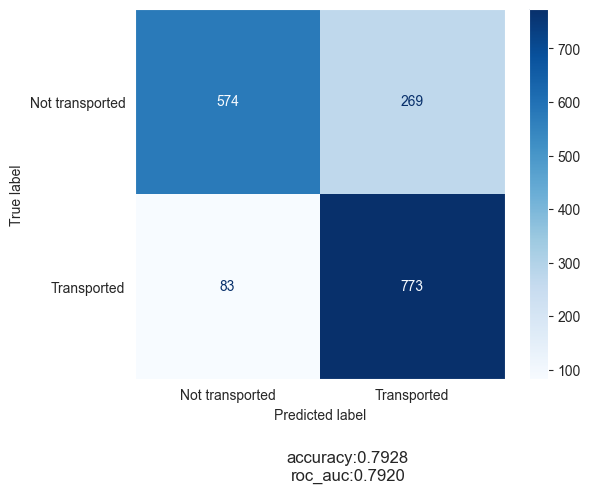

In [249]:
X = df_encoded.drop('Transported', axis=1)
y = df_encoded['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = xgb.XGBClassifier(
    seed=0,
    objective='binary:logistic',
    eval_metric= 'aucpr',
    gamma= 2,
    learning_rate= 0.1,
    max_depth= 7,
    min_child_weight= 3,
    n_estimators= 100,
    reg_alpha= 0.75,
    reg_lambda= 1,
    scale_pos_weight= 3
)

model.fit(X_train, y_train, verbose=1, eval_set=[(X_valid, y_valid)])

disp_ohe = ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.figtext(0.5, -0.1, 
    f"accuracy:{accuracy_score(y_valid, model.predict(X_valid)):.4f}\n"
    f"roc_auc:{roc_auc_score(y_valid, model.predict(X_valid)):.4f}", ha="center", fontsize=12)
plt.grid(False)
plt.show()

In [11]:
model_performances['XGBoost:onehotencoding']=0.7928

#### Comparison of each of approaches

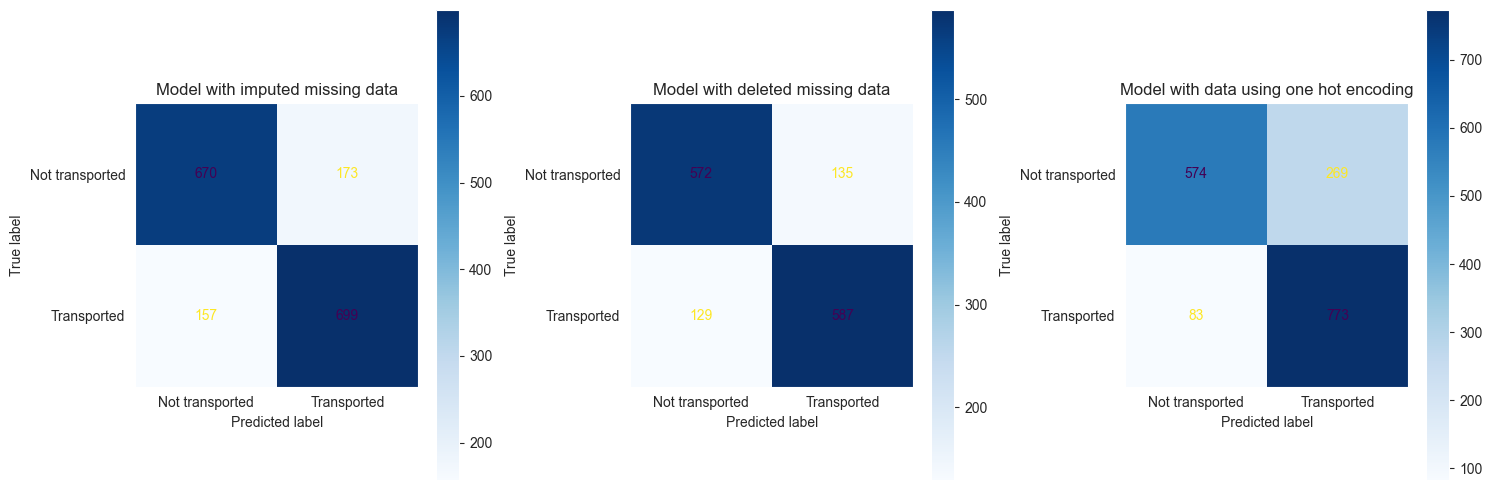

In [250]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
disp_imputed.plot(ax=axes[0])
disp_deleted.plot(ax=axes[1])
disp_ohe.plot(ax=axes[2])
axes[0].set_title("Model with imputed missing data")
axes[1].set_title("Model with deleted missing data")
axes[2].set_title("Model with data using one hot encoding")
for ax in axes:
    im = ax.get_images()[0]
    im.set_cmap('Blues')
    ax.grid(False)
plt.tight_layout()
plt.show()

## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

# # TEST 1
params = {
    'hidden_layer_sizes': [(40,), (80,), (120,), (160,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300, 500, 700],
    'batch_size': ['auto'],
    'learning_rate_init': [0.001],
    'momentum': [0.9],
    'early_stopping': [True],
    'random_state': [0]
}

# tune_model(MLPClassifier(), params, train_after_imputation)
# # OUTPUT  Found best parameters: {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'random_state': 0, 'solver': 'adam'} (0.8443)

# # TEST 2
params = {
    'hidden_layer_sizes': [(180,), (200,), (225,), (250,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.001, 0.005, 0.007],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.0008, 0.001, 0.003],
    'momentum': [0.8, 0.9, 0.95],
    'max_iter': [200, 250, 300, 350],
    'batch_size': ['auto'],
    'early_stopping': [True],
    'random_state': [0]
}

# tune_model(MLPClassifier(), params, train_after_imputation)
# # OUTPUT Found best parameters: {'activation': 'tanh', 'alpha': 0.007, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (250,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.003, 'max_iter': 350, 'momentum': 0.9, 'random_state': 0, 'solver': 'adam'} (0.8576)

# # TEST 3
params = {
    'hidden_layer_sizes': [(180,), (200,), (225,), (250,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [ 0.005, 0.007, 0.009],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.003, 0.005],
    'momentum': [0.8, 0.9, 0.95],
    'max_iter': [300, 350, 400, 500],
    'batch_size': ['auto'],
    'early_stopping': [True],
    'random_state': [0]
}

tune_model(MLPClassifier(), params, train_after_imputation)
# # OUTPUT Found best parameters: {'activation': 'tanh', 'alpha': 0.009, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'max_iter': 500, 'momentum': 0.9, 'random_state': 0, 'solver': 'adam'} (0.8592)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 20
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 20
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 60
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 96
n_resources: 180
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 540
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 1620
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
set - Found best parameters: {'activation': 'tanh', 'alpha': 0.009, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (200,), 'learning_rate': '

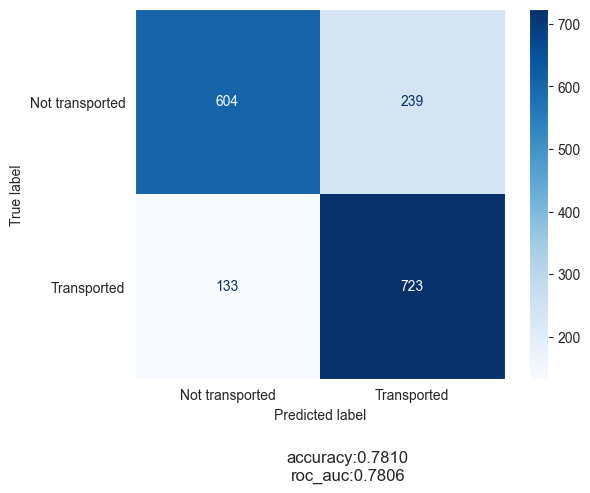

In [254]:
X = train_after_imputation.drop('Transported', axis=1)
y = train_after_imputation['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = MLPClassifier(
    activation= 'tanh',
    alpha= 0.009,
    batch_size= 'auto',
    early_stopping= True,
    hidden_layer_sizes= (200,),
    learning_rate= 'adaptive',
    learning_rate_init= 0.005,
    max_iter= 500,
    momentum= 0.9,
    solver= 'adam',
    random_state= 0
)

model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.figtext(0.5, -0.1,
    f"accuracy:{accuracy_score(y_valid, model.predict(X_valid)):.4f}\n"
    f"roc_auc:{roc_auc_score(y_valid, model.predict(X_valid)):.4f}", ha="center", fontsize=12)
plt.grid(False)
plt.show()

In [13]:
model_performances['MLP:imputation']=0.7810

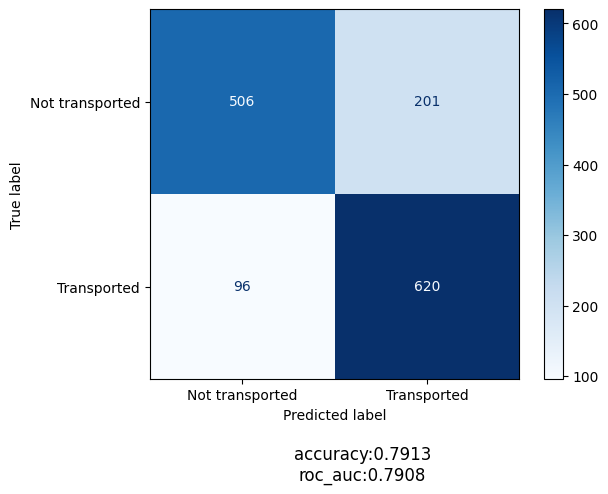

In [ ]:
train_after_deletion = data_for_testing['train_after_deletion']
X = train_after_deletion.drop('Transported', axis=1)
y = train_after_deletion['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = MLPClassifier(
    activation= 'tanh',
    alpha= 0.009,
    batch_size= 'auto',
    early_stopping= True,
    hidden_layer_sizes= (200,),
    learning_rate= 'adaptive',
    learning_rate_init= 0.005,
    max_iter= 500,
    momentum= 0.9,
    solver= 'adam',
    random_state= 0
)

model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.figtext(0.5, -0.1,
    f"accuracy:{accuracy_score(y_valid, model.predict(X_valid)):.4f}\n"
    f"roc_auc:{roc_auc_score(y_valid, model.predict(X_valid)):.4f}", ha="center", fontsize=12)
plt.grid(False)
plt.show()

In [57]:
model_performances['MLP:deletion']=0.7810

# Summary

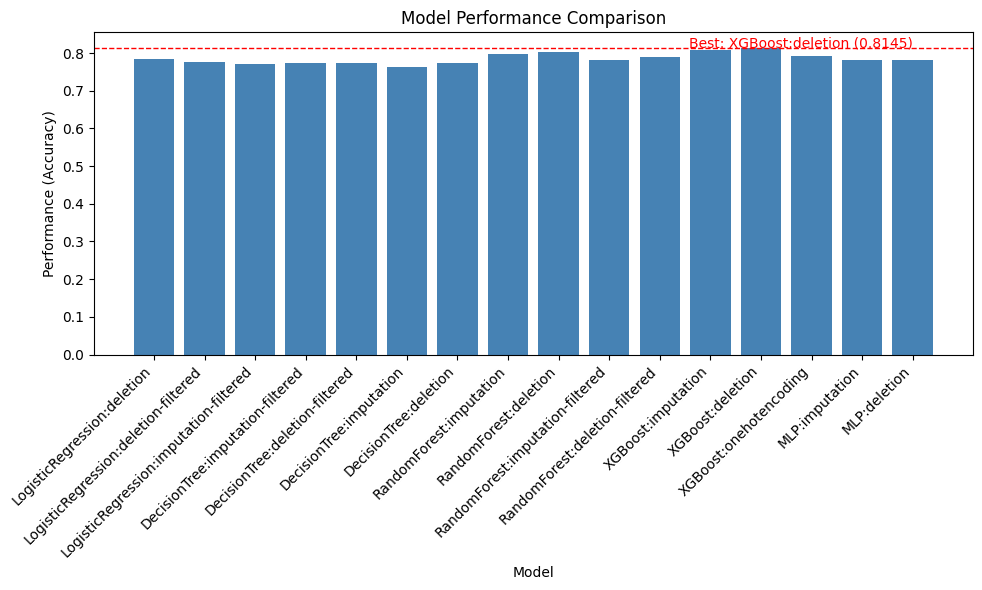

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(model_performances.keys(), model_performances.values(), color='steelblue')
plt.xlabel('Model')
plt.ylabel('Performance (Accuracy)')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')

best_model = max(model_performances, key=model_performances.get)
best_score = model_performances[best_model]
plt.axhline(y=best_score, color='red', linestyle='--', linewidth=1)
plt.text(len(model_performances) - 1, best_score, f'Best: {best_model} ({best_score:.4f})', color='red', ha='right')

plt.tight_layout()
plt.show()

#### The best model for classification is XGBoost after data deletion